In [1]:
#IMPORTS
import pandas as pd 
from tabulate import tabulate
import folium
from folium.plugins import MarkerCluster
from IPython.display import display
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
import plotly.express as px

In [2]:
air_data= pd.read_csv('./Data/AQI/2021_Daily_Aqi_Data_Cleaned.csv')

air_data

date  zip_code ReportingArea StateCode  Latitude  Longitude  \
0      2021-01-01      2045      Weymouth        MA   42.2459   -70.9628   
1      2021-01-02      2045      Weymouth        MA   42.2459   -70.9628   
2      2021-01-03      2045      Weymouth        MA   42.2459   -70.9628   
3      2021-01-04      2045      Weymouth        MA   42.2459   -70.9628   
4      2021-01-05      2045      Weymouth        MA   42.2459   -70.9628   
...           ...       ...           ...       ...       ...        ...   
16395  2021-12-27      2446        Boston        MA   42.3510   -71.0510   
16396  2021-12-28      2446        Boston        MA   42.3510   -71.0510   
16397  2021-12-29      2446        Boston        MA   42.3510   -71.0510   
16398  2021-12-30      2446        Boston        MA   42.3510   -71.0510   
16399  2021-12-31      2446        Boston        MA   42.3510   -71.0510   

       OZONEAQI  PM2.5AQI  PM10AQI  CategoryNumber CategoryName  
0           NaN      40.0      NaN             1.0         Good  
1           NaN      17.0      NaN             1.0         Good  
2           NaN      25.0      NaN             1.0         Good  
3           NaN      28.0      NaN             1.0         Good  
4           NaN      20.0      NaN             1.0         Good  
...         ...       ...      ...             ...          ...  
16395      13.0      28.0      NaN             1.0         Good  
16396      15.0      42.0      NaN             1.0         Good  
16397      12.0      45.0      NaN             1.0         Good  
16398       3.0      55.0      NaN             1.0         Good  
16399       6.0      67.0      NaN             1.0         Good  

[16400 rows x 11 columns]

In [3]:
air_data.groupby(['zip_code', 'Latitude', 'Longitude'])

air_data

date  zip_code ReportingArea StateCode  Latitude  Longitude  \
0      2021-01-01      2045      Weymouth        MA   42.2459   -70.9628   
1      2021-01-02      2045      Weymouth        MA   42.2459   -70.9628   
2      2021-01-03      2045      Weymouth        MA   42.2459   -70.9628   
3      2021-01-04      2045      Weymouth        MA   42.2459   -70.9628   
4      2021-01-05      2045      Weymouth        MA   42.2459   -70.9628   
...           ...       ...           ...       ...       ...        ...   
16395  2021-12-27      2446        Boston        MA   42.3510   -71.0510   
16396  2021-12-28      2446        Boston        MA   42.3510   -71.0510   
16397  2021-12-29      2446        Boston        MA   42.3510   -71.0510   
16398  2021-12-30      2446        Boston        MA   42.3510   -71.0510   
16399  2021-12-31      2446        Boston        MA   42.3510   -71.0510   

       OZONEAQI  PM2.5AQI  PM10AQI  CategoryNumber CategoryName  
0           NaN      40.0      NaN             1.0         Good  
1           NaN      17.0      NaN             1.0         Good  
2           NaN      25.0      NaN             1.0         Good  
3           NaN      28.0      NaN             1.0         Good  
4           NaN      20.0      NaN             1.0         Good  
...         ...       ...      ...             ...          ...  
16395      13.0      28.0      NaN             1.0         Good  
16396      15.0      42.0      NaN             1.0         Good  
16397      12.0      45.0      NaN             1.0         Good  
16398       3.0      55.0      NaN             1.0         Good  
16399       6.0      67.0      NaN             1.0         Good  

[16400 rows x 11 columns]

In [4]:
unique_zip_codes = air_data['zip_code'].unique()
number_of_unique_zip_codes = len(unique_zip_codes)

print("Number of unique zip codes:", number_of_unique_zip_codes)

Number of unique zip codes: 45


In [5]:
category = air_data['CategoryName'].value_counts()

category_df = pd.DataFrame({'CategoryName': category.index, 'Count': category.values})

table = tabulate(category_df, headers='keys', tablefmt='fancy_grid')

print(table)

╒════╤════════════════════════════════╤═════════╕
│    │ CategoryName                   │   Count │
╞════╪════════════════════════════════╪═════════╡
│  0 │ Good                           │   15699 │
├────┼────────────────────────────────┼─────────┤
│  1 │ Moderate                       │     625 │
├────┼────────────────────────────────┼─────────┤
│  2 │ Unhealthy for Sensitive Groups │      47 │
╘════╧════════════════════════════════╧═════════╛


###  VISUALS  FOR 2021 AQI DATA
Based on the 2021 AQI data, it appears that most of the zipcodes in Boston(15K out of 16K) had Good AQI levels meaning that overall quality of air in Boston is 'Good' The following visuals below depict the AQI in a consumable manner

In [6]:
## Get the mean PM2.5 and OZONE AQI values per zip codes --> 45 total

air_data_mean= pd.read_csv('./Data/AQI/2021_Avg_Aqi_Data_Cleaned.csv')
air_data_mean.head()

zip_code   OZONEAQI   PM2.5AQI
0      2045  35.123636  29.016807
1      2108  31.083799  33.369863
2      2109  31.075630  33.373626
3      2110  31.083799  33.369863
4      2111  31.083799  33.369863

In [7]:
PM25 = air_data_mean.dropna(subset=['PM2.5AQI'])

boston_coords = [42.3601, -71.0589]  # Boston's latitude and longitude
m = folium.Map(location=boston_coords, zoom_start=12)


marker_cluster = MarkerCluster().add_to(m)


def get_marker_color(aqi):
    if aqi < 35:
        return 'green'

    
for index, row in PM25.iterrows():
    zip_code = row['zip_code']
    aqi = row['PM2.5AQI']
    color = get_marker_color(aqi)
    popup_text = f'<b>AQI:</b> {aqi}'
    folium.CircleMarker(location=boston_coords, radius= 20 , color=color, fill=True, fill_color=color, popup=popup_text).add_to(marker_cluster)

# Create a legend for AQI values
legend_html = """
<div style="position: fixed; bottom: 50px; left: 50px; background-color: white; z-index: 1000; padding: 10px; border: 2px solid grey; font-size: 14px;">
    <p><strong>AQI Legend</strong></p>
    <p>AQI &lt; 35: Green (Good)</p>
</div>
"""


m.get_root().html.add_child(folium.Element(legend_html))

#display(m)

m.save("aqi_cluster_map.html")

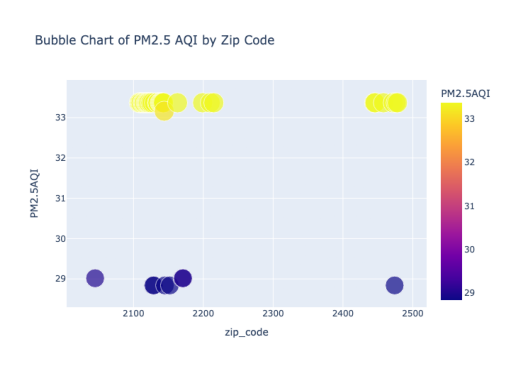

In [8]:
# Assuming you already have 'grouped_data' containing the mean PM2.5 AQI for each zip code
# Filter out rows with NaN values in the 'PM2.5AQI' column
# Assuming you already have 'grouped_data' containing the mean PM2.5 AQI for each zip code
# Filter out rows with NaN values in the 'PM2.5AQI' column
PM25 = air_data_mean.dropna(subset=['PM2.5AQI'])

fig = px.scatter(PM25, x='zip_code', y='PM2.5AQI', size='PM2.5AQI', color='PM2.5AQI', title='Bubble Chart of PM2.5 AQI by Zip Code')

# Modify the layout to hide the legend and y-axis labels
fig.update_layout(showlegend=False)
fig.update_yaxes(visible=True)

# Save the chart as a PNG image
fig.write_image("bubble_chart.png", engine="kaleido")

# Now display the saved PNG image using matplotlib
img = plt.imread("bubble_chart.png")
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.show()

### TRANSPORT DATA
Now that we have established the overall air quality to be 'Good' for 2021, we can explore transportation data by zipcodes to see how modes of transport can influence daily fluctations in air quality.

In [9]:
### cleaned census data for transportation #### 

census_transport = pd.read_csv('Data/Census/census_transport.csv')

census_transport.head()

Zipcode  Estimated_Total_Population_Commuting_to_Work_16_years_and_over  \
0     2045                                               6055                
1     2108                                               2081                
2     2109                                               2605                
3     2110                                               1154                
4     2111                                               3715                

   Estimated_Total_Population_Commuting_to_Work_16_years_and_over_Car, truck, or van -- drove alone  \
0                                               4369                                                  
1                                                190                                                  
2                                                383                                                  
3                                                294                                                  
4                                                514                                                  

   Estimated_Total_Population_Commuting_to_Work_16_years_and_over_Car, truck, or van -- carpooled  \
0                                                336                                                
1                                                 40                                                
2                                                 10                                                
3                                                 18                                                
4                                                 84                                                

   Estimated_Total_Population_Commuting_to_Work_16_years_and_over_Public transportation (excluding taxicab)  \
0                                                462                                                          
1                                                389                                                          
2                                                402                                                          
3                                                138                                                          
4                                                578                                                          

   Estimated_Total_Population_Commuting_to_Work_16_years_and_over_Walked  \
0                                                157                       
1                                                891                       
2                                               1333                       
3                                                485                       
4                                               1841                       

   Estimated_Total_Population_Commuting_to_Work_16_years_and_over_Other means  \
0                                                 39                            
1                                                 84                            
2                                                 80                            
3                                                 14                            
4                                                146                            

   Estimated_Total_Population_Commuting_to_Work_16_years_and_over_Worked from home  \
0                                                692                                 
1                                                487                                 
2                                                397                                 
3                                                205                                 
4                                                552                                 

   Percent_Total_Population_Commuting_to_Work_16_years_and_over_Car, truck, or van -- drove alone  \
0                                               72.2                           

In [10]:
### Total number of Boston residents across 45 zip codes transport mediums: 
total_work = census_transport['Estimated_Total_Population_Commuting_to_Work_16_years_and_over'].mean()
total_work

12630.631578947368

So this means, an avergae of 12.6K residents that are 16 years or older using some form to public transport to work on a daily basis

In [11]:
### Further exploring each of the modes of transportation##

car_carpool = census_transport['Percent_Total_Population_Commuting_to_Work_16_years_and_over_Car, truck, or van -- carpooled'].mean()
car = census_transport['Percent_Total_Population_Commuting_to_Work_16_years_and_over_Car, truck, or van -- drove alone'].mean()

car_total = car_carpool + car
car_totals = car_total/2

car_totals

17.43289473684211

Aprrox. 17% residents across the 45 zip codes in Boston area commute to work using a car(either driving alone or car pooling) 

In [12]:
public_transport = census_transport['Percent_Total_Population_Commuting_to_Work_16_years_and_over_Public transportation (excluding taxicab)'].mean()
public_transport

23.46052631578947

Aprrox. 23% residents across the 45 zip codes in Boston area commute to work using a medium of public transport(train. commuter rail, bus, ferry) 

In [13]:
### WALK #####
walked = census_transport['Percent_Total_Population_Commuting_to_Work_16_years_and_over_Walked'].mean()
walked

22.376315789473686

Aprrox. 22% residents across the 45 zip codes in Boston area walk to their place of work(maybe close in proximity to place of work --> can be explored further) 

In [14]:
### WORKED FROM HOME #####
home_work = census_transport['Percent_Total_Population_Commuting_to_Work_16_years_and_over_Worked from home'].mean()
home_work

14.510526315789473

Aprrox. 15% residents across the 45 zip codes in Boston area work remotely and don't use any mode of transportation.

In [15]:
## TO SUMMARIZE: Across all 45 zip codes in Boston, 16+ years fall into the following modes of transport:

other = census_transport['Percent_Total_Population_Commuting_to_Work_16_years_and_over_Other means'].mean()
car_total = car_carpool + car

# Round the percentages to two decimal places
car_total = round(car_total, 2)
public_transport = round(public_transport, 2)
walked = round(walked, 2)
home_work = round(home_work, 2)
other = round(other, 2)

# Create a dictionary with the data
data = {
    'Means of Commuting': ['Car', 'Public Transport', 'Walk', 'Worked from Home', 'Other'],
    'Average Percentage': [car_total, public_transport, walked, home_work, other]
}

# Create a DataFrame from the dictionary
commuting_df = pd.DataFrame(data)

# Convert the DataFrame to a tabular format
table = tabulate(commuting_df, headers='keys', tablefmt='fancy_grid')


print(table)

╒════╤══════════════════════╤══════════════════════╕
│    │ Means of Commuting   │   Average Percentage │
╞════╪══════════════════════╪══════════════════════╡
│  0 │ Car                  │                34.87 │
├────┼──────────────────────┼──────────────────────┤
│  1 │ Public Transport     │                23.46 │
├────┼──────────────────────┼──────────────────────┤
│  2 │ Walk                 │                22.38 │
├────┼──────────────────────┼──────────────────────┤
│  3 │ Worked from Home     │                14.51 │
├────┼──────────────────────┼──────────────────────┤
│  4 │ Other                │                 4.77 │
╘════╧══════════════════════╧══════════════════════╛


### VISUALS FOR TRANSPORT DATA
Lets expand these overall trends to understand the most common mode of transport per zip code(note graph split into 2 parts for readablity):

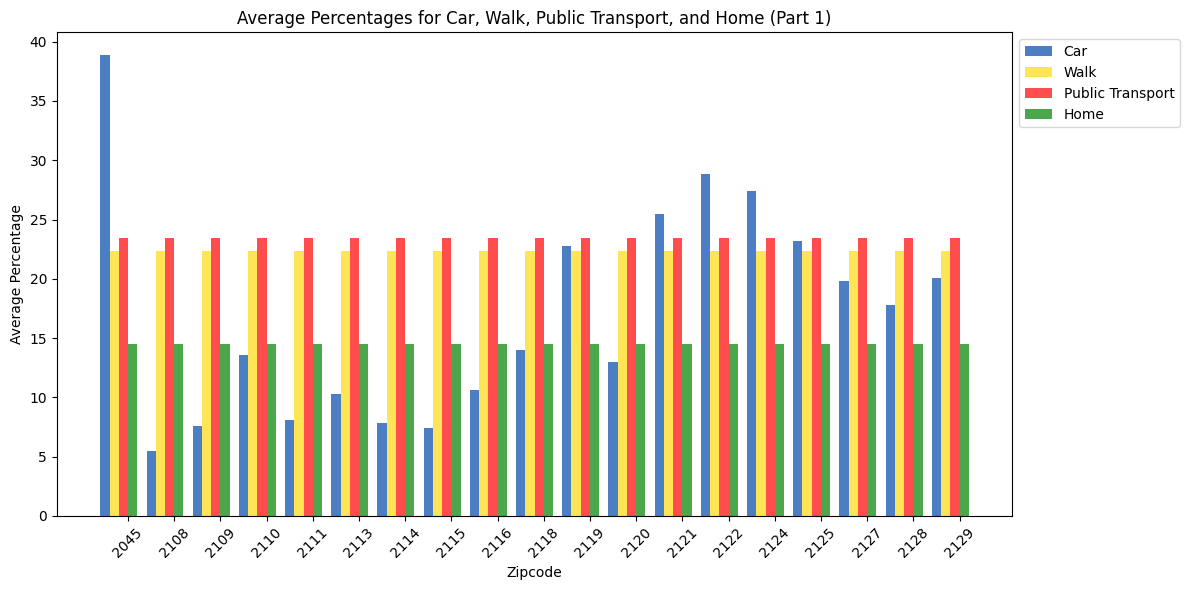

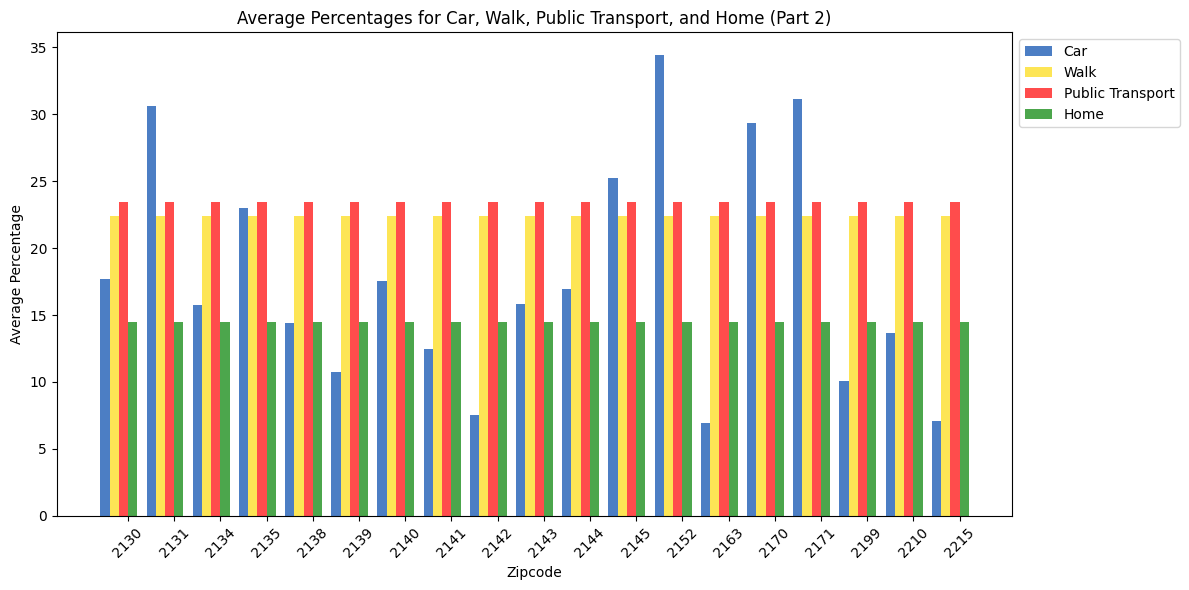

In [16]:
# Calculate the average percentages for car, walk, public transport, and home for each zipcode
census_transport['Average_Car'] = (census_transport['Percent_Total_Population_Commuting_to_Work_16_years_and_over_Car, truck, or van -- drove alone'] +
                                   census_transport['Percent_Total_Population_Commuting_to_Work_16_years_and_over_Car, truck, or van -- carpooled']) / 2
census_transport['Average_Walk'] = census_transport['Percent_Total_Population_Commuting_to_Work_16_years_and_over_Walked'].mean()
census_transport['Average_Public_Transport'] = census_transport['Percent_Total_Population_Commuting_to_Work_16_years_and_over_Public transportation (excluding taxicab)'].mean()
census_transport['Average_Home'] = census_transport['Percent_Total_Population_Commuting_to_Work_16_years_and_over_Worked from home'].mean()

# Create an array for x-positions
x = np.arange(len(census_transport['Zipcode']))

# Set the bar width
bar_width = 0.2

# Define the gap between zipcodes
gap = 0.2

# Define the number of zipcodes to split into two graphs (e.g., half the zipcodes in each)
split_index = len(x) // 2


custom_colors = ['#0047AB', '#FDDA0D', 'red', 'green']


# Create the first grouped bar chart
plt.figure(figsize=(12, 6))
car_bars = plt.bar(x[:split_index] - 1.5 * bar_width - gap, census_transport['Average_Car'][:split_index], width=bar_width, label='Car', alpha=0.7, color = custom_colors[0])
walk_bars = plt.bar(x[:split_index] - 0.5 * bar_width - gap, census_transport['Average_Walk'][:split_index], width=bar_width, label='Walk', alpha=0.7, color = custom_colors[1])
pt_bars = plt.bar(x[:split_index] + 0.5 * bar_width - gap, census_transport['Average_Public_Transport'][:split_index], width=bar_width, label='Public Transport', alpha=0.7, color = custom_colors[2])
home_bars = plt.bar(x[:split_index] + 1.5 * bar_width - gap, census_transport['Average_Home'][:split_index], width=bar_width, label='Home', alpha=0.7, color = custom_colors[3])

plt.xlabel('Zipcode')
plt.ylabel('Average Percentage')
plt.title('Average Percentages for Car, Walk, Public Transport, and Home (Part 1)')

# Adjust the x-axis ticks and labels
plt.xticks(x[:split_index], census_transport['Zipcode'][:split_index], rotation=45)

# Place the legend outside the graph
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

# Create the second grouped bar chart
plt.figure(figsize=(12, 6))
car_bars = plt.bar(x[split_index:] - 1.5 * bar_width - gap, census_transport['Average_Car'][split_index:], width=bar_width, label='Car', alpha=0.7, color = custom_colors[0])
walk_bars = plt.bar(x[split_index:] - 0.5 * bar_width - gap, census_transport['Average_Walk'][split_index:], width=bar_width, label='Walk', alpha=0.7, color = custom_colors[1])
pt_bars = plt.bar(x[split_index:] + 0.5 * bar_width - gap, census_transport['Average_Public_Transport'][split_index:], width=bar_width, label='Public Transport', alpha=0.7, color = custom_colors[2])
home_bars = plt.bar(x[split_index:] + 1.5 * bar_width - gap, census_transport['Average_Home'][split_index:], width=bar_width, label='Home', alpha=0.7, color = custom_colors[3])

plt.xlabel('Zipcode')
plt.ylabel('Average Percentage')
plt.title('Average Percentages for Car, Walk, Public Transport, and Home (Part 2)')

# Adjust the x-axis ticks and labels
plt.xticks(x[split_index:], census_transport['Zipcode'][split_index:], rotation=45)

# Place the legend outside the graph
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

Based on the grouped bar graphs above, we see that Car seems to be the most popular medium of transport, followed by public transport. What can be further studied is the impact this can have on air quality and how Boston combats this since the air quality for 3032 is relatively 'Good'

### PPI DATA
Next, lets explore PPI Data Trends to measure how proximity to roads impact residents of Boston, especially different racial groups disproportionately. 

In [17]:
ppi_df  = pd.read_csv('./Data/PPI/ppi.csv')

ppi_df

objectid  g250m_id  commtypid                commtype  nhwhi_10  \
0             1  144054.0          3        Maturing Suburbs     26.88   
1             2  115030.0          3        Maturing Suburbs     33.00   
2             3  232476.0          4      Developing Suburbs      2.66   
3             4  112471.0          4      Developing Suburbs      1.34   
4             5  148255.0          1              Inner Core      0.00   
...         ...       ...        ...                     ...       ...   
62171     62172   70856.0          3        Maturing Suburbs      3.25   
62172     62173   85868.0          3        Maturing Suburbs      0.00   
62173     62174   73413.0          2  Regional Urban Centers    107.08   
62174     62175   88437.0          3        Maturing Suburbs      4.23   
62175     62176   25705.0          4      Developing Suburbs     57.66   

       nhaa_10  nhapi_10  lat_10  nhoth_10  ppi5  \
0         0.37      3.03    0.37      1.04     2   
1         0.00     14.59    0.31      2.10     1   
2         0.00      0.00    0.00      0.00     4   
3         0.00      0.04    0.02      0.00     0   
4         0.00      0.00    0.00      0.00     0   
...        ...       ...     ...       ...   ...   
62171     0.00      0.00    0.00      0.00     4   
62172     0.00      0.00    0.00      0.00     0   
62173     1.19      3.08    1.81      5.06     0   
62174     0.00      0.17    0.09      0.02     0   
62175     0.05      1.02    1.91      0.91     0   

                                                   shape  
0      3C00000005000000080010006A69000020000000011000...  
1      3C00000005000000080010006A69000020000000011000...  
2      3C00000005000000080010006A69000020000000011000...  
3      3C00000005000000080010006A69000020000000011000...  
4      0C01000028000000080010006A690000B0030000011000...  
...                                                  ...  
62171  3C00000005000000080010006A69000020070000011000...  
62172  4200000006000000080010006A69000026070000011000...  
62173  3C00000005000000080010006A69000020070000011000...  
62174  790000000F000000080010006A6900009D010000011000...  
62175  3C00000005000000080010006A69000020010000011000...  

[62176 rows x 11 columns]

In [18]:
### PPI Average Densities for Category 0 

ppi_df.dropna(inplace=True)
ppi_df0 = ppi_df[ppi_df['ppi5'] == 0]
ppi_df0_avg = ppi_df0[['nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']].mean()
ppi_df0_std = ppi_df0[['nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']].std()
print(ppi_df0_avg.head())


nhwhi_10    12.783550
nhaa_10      0.516185
nhapi_10     0.780224
lat_10       0.507531
nhoth_10     0.289226
dtype: float64


In [19]:
### PPI Average Densities for Category 1
ppi_df1 = ppi_df[ppi_df['ppi5'] == 1]
ppi_df1_avg = ppi_df1[['nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']].mean()
ppi_df1_std = ppi_df1[['nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']].std()
print(ppi_df1_avg.head())


nhwhi_10    24.379456
nhaa_10      1.080559
nhapi_10     1.518334
lat_10       1.197523
nhoth_10     0.612091
dtype: float64


In [20]:
### PPI Average Densities for Category 2
ppi_df2 = ppi_df[ppi_df['ppi5'] == 2]
ppi_df2_avg = ppi_df2[['nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']].mean()
ppi_df2_std = ppi_df2[['nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']].std()
print(ppi_df2_avg.head())

nhwhi_10    34.607915
nhaa_10      2.041301
nhapi_10     2.345419
lat_10       1.854871
nhoth_10     0.950391
dtype: float64


In [21]:
### PPI Average Densities for Category 3
ppi_df3 = ppi_df[ppi_df['ppi5'] == 3]
ppi_df3_avg = ppi_df3[['nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']].mean()
ppi_df3_std = ppi_df3[['nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']].std()
print(ppi_df3_avg.head())

nhwhi_10    46.888427
nhaa_10      3.960835
nhapi_10     3.413472
lat_10       3.451681
nhoth_10     1.699663
dtype: float64


In [22]:
### PPI Average Densities for Category 4
ppi_df4 = ppi_df[ppi_df['ppi5'] == 4]
ppi_df4_avg = ppi_df4[['nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']].mean()
ppi_df4_std = ppi_df4[['nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']].std()
print(ppi_df4_avg.head())

nhwhi_10    72.887019
nhaa_10      9.893672
nhapi_10     7.263983
lat_10       9.668967
nhoth_10     3.697175
dtype: float64


In [23]:
### PPI Average Densities for Category 5
ppi_df5 = ppi_df[ppi_df['ppi5'] == 5]
ppi_df5_avg = ppi_df5[['nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']].mean()
ppi_df5_std = ppi_df5[['nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']].std()
print(ppi_df5_avg.head())

nhwhi_10    89.178365
nhaa_10     15.449001
nhapi_10    15.333186
lat_10      21.452750
nhoth_10     5.590272
dtype: float64


### VISUALS FOR PPI DATA

In [24]:
ppi_new = ppi_df['ppi5'].value_counts()
#ppi_new = ppi_new.sort_values(ascending=True)
ppi = sum(ppi_new)

print(ppi_new.head())

ppi0 = 25571 / ppi
ppi1 = 7262  / ppi
ppi2 = 7326  / ppi 
ppi3 = 7335  / ppi
ppi4 = 7340  / ppi
ppi5 = 7342  / ppi 

ppi5
0    25571
5     7342
4     7340
3     7335
2     7326
Name: count, dtype: int64


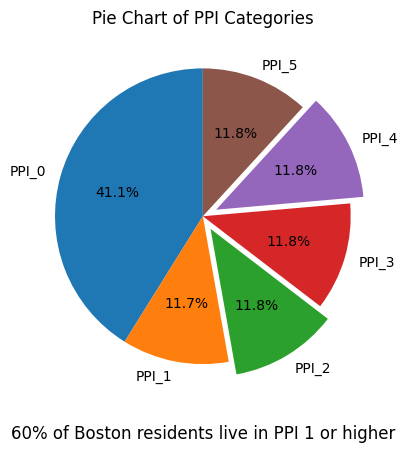

In [25]:
x = [25571, 7262, 7326, 7335, 7340, 7342]
labels = ['PPI_0', 'PPI_1', 'PPI_2', 'PPI_3', 'PPI_4', 'PPI_5']
explode = (0, 0, 0.1, 0, 0.1, 0)

# Create a pie chart with percentages displayed inside each slice
plt.pie(x, labels=labels, explode=explode, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Pie Chart of PPI Categories')

# Add a label
plt.text(0, -1.5, '60% of Boston residents live in PPI 1 or higher', ha='center', fontsize=12)

plt.show()

Version 1 and 2 for PPI and RACIAL GROUPS

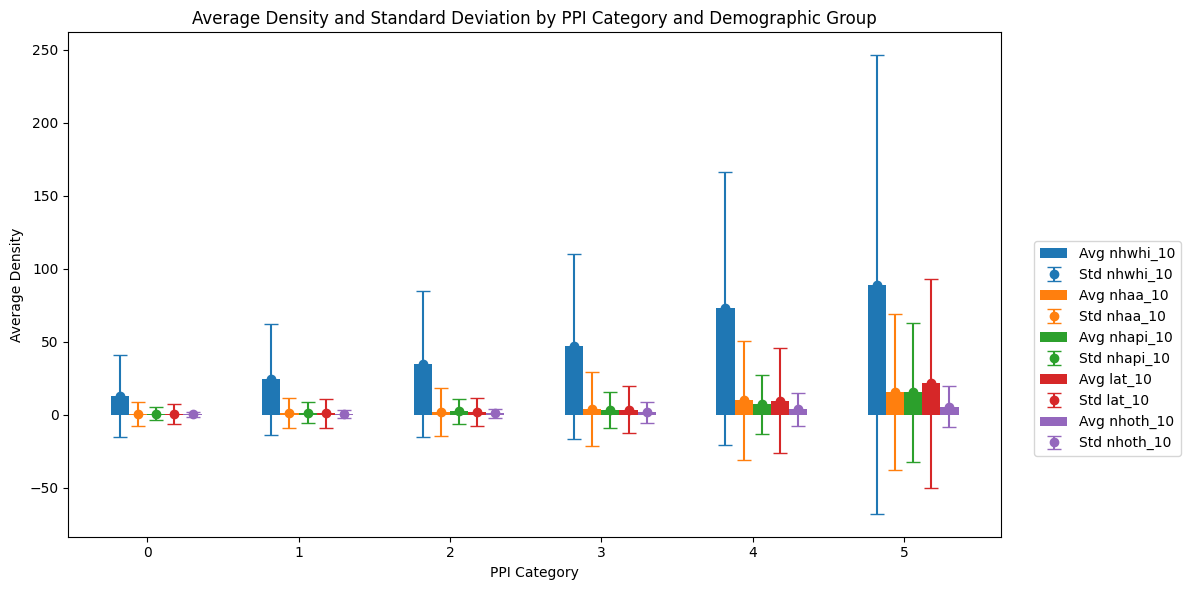

In [26]:
# Define demographic groups
demographic_groups = ['nhwhi_10', 'nhaa_10', 'nhapi_10', 'lat_10', 'nhoth_10']

# Data for each 'ppi5' category
ppi_categories = ['0', '1', '2', '3', '4', '5']
ppi_avgs = [ppi_df0_avg, ppi_df1_avg, ppi_df2_avg, ppi_df3_avg, ppi_df4_avg, ppi_df5_avg]
ppi_stds = [ppi_df0_std, ppi_df1_std, ppi_df2_std, ppi_df3_std, ppi_df4_std, ppi_df5_std]

# Create a bar chart for each demographic group
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.12 # Width of each bar

for i, group in enumerate(demographic_groups):
    avg_values = [avg[group] for avg in ppi_avgs]
    std_values = [std[group] for std in ppi_stds]

    x = [j + i * width for j in range(len(ppi_categories))]
    plt.bar(x, avg_values, width=width, label=f'Avg {group}')
    plt.errorbar(x, avg_values, yerr=std_values, fmt='o', label=f'Std {group}', capsize=5)

plt.xlabel('PPI Category')
plt.ylabel('Average Density')
plt.title('Average Density and Standard Deviation by PPI Category and Demographic Group')
plt.xticks([i + 1.5 * width for i in range(len(ppi_categories))], ppi_categories)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 0.6))
plt.tight_layout()
plt.show()

### CENSUS DATA

In [27]:
# Specify the income range categories
air_data= pd.read_csv('./Data/AQI/2021_Daily_Aqi_Data_Cleaned.csv')
DP03 = pd.read_csv('./Data/Census/DP03_Cleaned.csv')

first = DP03['Percent_Total_Households_Income_and_Benefits_Less than $10,000'].mean()

second = DP03['Percent_Total_Households_Income_and_Benefits_$10,000 to $14,999'].mean()

third = DP03['Percent_Total_Households_Income_and_Benefits_$25,000 to $34,999'].mean()

fourth = DP03['Percent_Total_Households_Income_and_Benefits_$50,000 to $74,999'].mean()

fifth = DP03['Percent_Total_Households_Income_and_Benefits_$35,000 to $49,999'].mean()

sixth = DP03['Percent_Total_Households_Income_and_Benefits_$50,000 to $74,999'].mean()

seventh = DP03['Percent_Total_Households_Income_and_Benefits_$75,000 to $99,999'].mean() 

eight = DP03['Percent_Total_Households_Income_and_Benefits_$100,000 to $149,999'].mean()

nine = DP03['Percent_Total_Households_Income_and_Benefits_$150,000 to $199,999'].mean()

ten = DP03['Percent_Total_Households_Income_and_Benefits_$200,000 or more'].mean()


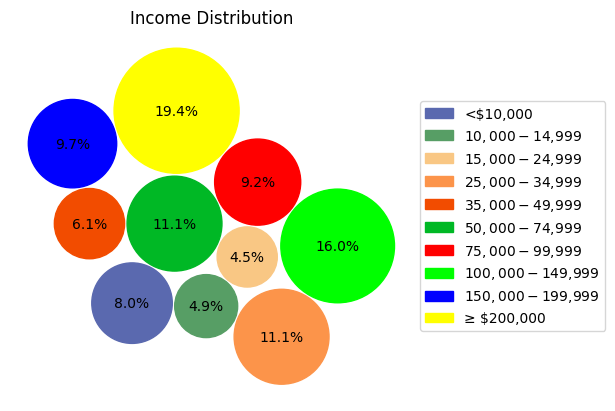

In [28]:
class BubbleChart:
    def __init__(self, income_means, bubble_spacing=0):
        """
        Setup for bubble collapse.

        Parameters
        ----------
        income_means : array-like
            Mean income values for different categories.
        bubble_spacing : float, default: 0
            Minimal spacing between bubbles after collapsing.
        """
        income_means = np.asarray(income_means)
        r = np.sqrt(income_means / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(income_means), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = income_means
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - \
            bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return np.argmin(distance, keepdims=True)

    def collapse(self, n_iterations=50):
        """
        Move bubbles to the center of mass.

        Parameters
        ----------
        n_iterations : int, default: 50
            Number of moves to perform.
        """
        for _ in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):
        for i in range(len(self.bubbles)):
            if i < len(labels) and i < len(colors):
                # Scale the radius to increase the bubble size
                radius = 1 * self.bubbles[i, 2]
                circ = plt.Circle(
                    self.bubbles[i, :2], radius, color=colors[i])
                ax.add_patch(circ)
                
    
                percentage = (self.bubbles[i, 3] / np.sum(self.bubbles[:, 3])) * 100
                ax.text(*self.bubbles[i, :2], f"{percentage:.1f}%",
                        horizontalalignment='center', verticalalignment='center')
        
        legend_labels = [f'{label}' for label in labels]
        ax.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

income_means = [first, second, third, fourth, fifth, sixth, seventh, eight, nine, ten]
labels = ['<$10,000', '$10,000-$14,999', '$15,000-$24,999', '$25,000-$34,999', '$35,000-$49,999', '$50,000-$74,999', '$75,000-$99,999', '$100,000-$149,999', '$150,000-$199,999', '≥ $200,000']
colors = ['#5A69AF', '#579E65', '#F9C784', '#FC944A', '#F24C00', '#00B825', '#FF0000', '#00FF00', '#0000FF', '#FFFF00']

bubble_chart = BubbleChart(income_means, bubble_spacing=0.1)
bubble_chart.collapse()
custom_colors = ['#5A69AF', '#579E65', '#F9C784', '#FC944A', '#F24C00', '#00B825', '#FF0000', '#00FF00', '#0000FF', '#FFFF00']


fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"))
bubble_chart.plot(ax, labels, colors= custom_colors)
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('Income Distribution')

plt.show()

In [29]:
#Importing the AQI dataset
AQI_file_path = './Data/AQI/2021_Avg_Aqi_Data_Cleaned.csv'
AQI = pd.read_csv(AQI_file_path)

#Importing the DP02 dataset
DP02_file_path = "./Data/Census/DP02_Cleaned.csv"
DP02 = pd.read_csv(DP02_file_path)

#Merging DP02 and AQI on zipcodes.
DP02_AQI = AQI.merge(DP02, left_on='zip_code', right_on='Zipcode', how='inner')

#Importng the DP03 dataset
DP03_file_path = "./Data/Census/DP03_Cleaned.csv"
DP03 = pd.read_csv(DP03_file_path)

#Merging DP03 and AQI on zipcodes.
DP03_AQI = AQI.merge(DP03, left_on='zip_code', right_on='Zipcode', how='inner')

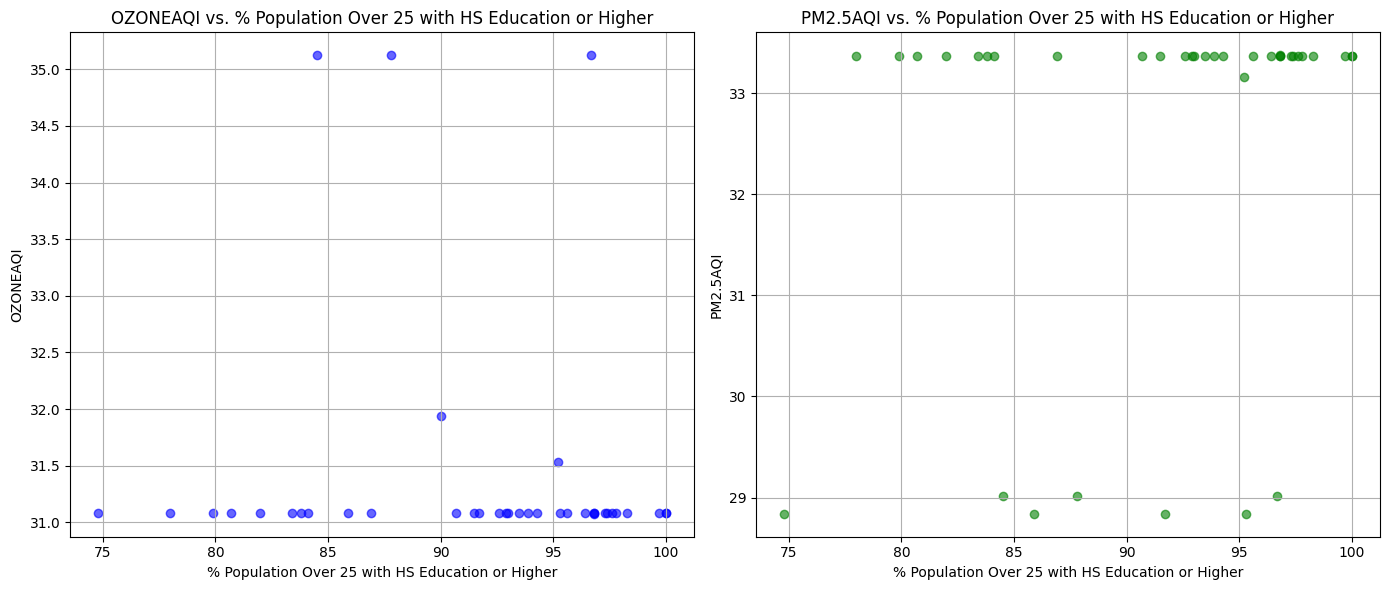

In [30]:
# Scatter plot for OZONEAQI vs Percent_Population_Over_25_Education_Attainment_High school graduate or higher
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(DP02_AQI['Percent_Population_Over_25_Education_Attainment_High school graduate or higher'],
            DP02_AQI['OZONEAQI'], color='blue', alpha=0.6)
plt.title('OZONEAQI vs. % Population Over 25 with HS Education or Higher')
plt.xlabel('% Population Over 25 with HS Education or Higher')
plt.ylabel('OZONEAQI')
plt.grid(True)

# Scatter plot for PM2.5AQI vs Percent_Population_Over_25_Education_Attainment_High school graduate or higher
plt.subplot(1, 2, 2)
plt.scatter(DP02_AQI['Percent_Population_Over_25_Education_Attainment_High school graduate or higher'],
            DP02_AQI['PM2.5AQI'], color='green', alpha=0.6)
plt.title('PM2.5AQI vs. % Population Over 25 with HS Education or Higher')
plt.xlabel('% Population Over 25 with HS Education or Higher')
plt.ylabel('PM2.5AQI')
plt.grid(True)

plt.tight_layout()
plt.show()

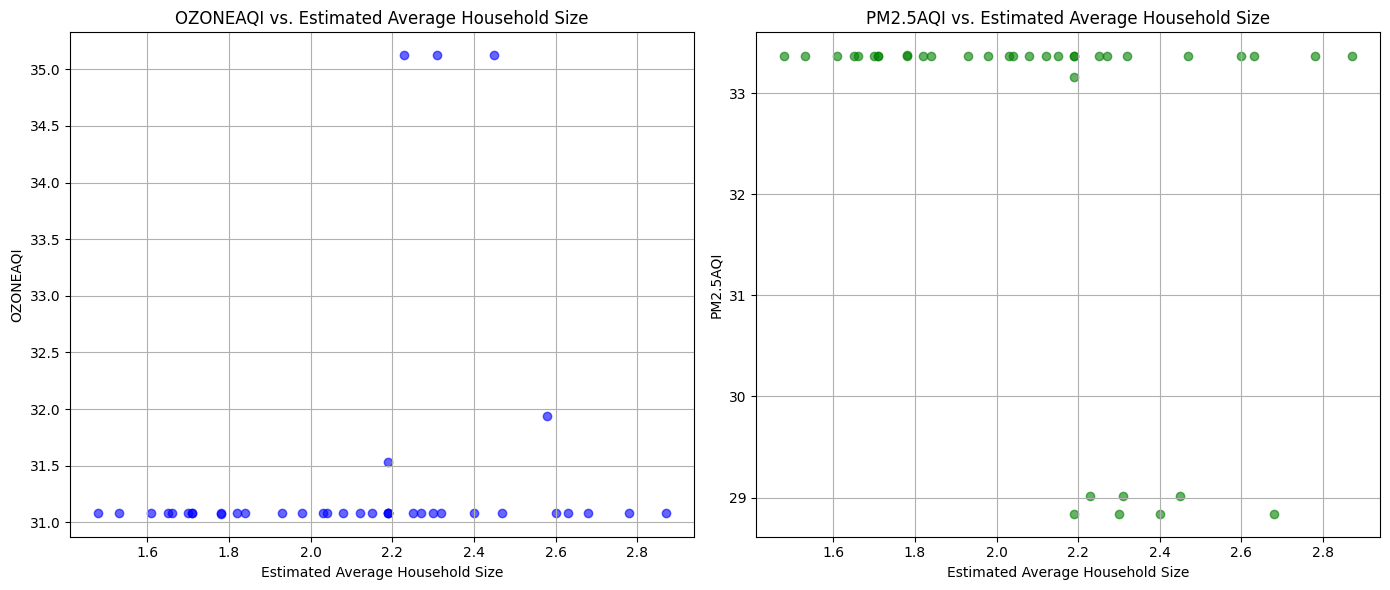

In [31]:
# Scatter plot for OZONEAQI vs Estimated_Average_Household_Size
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(DP02_AQI['Estimated_Average_Household_Size'], DP02_AQI['OZONEAQI'], color='blue', alpha=0.6)
plt.title('OZONEAQI vs. Estimated Average Household Size')
plt.xlabel('Estimated Average Household Size')
plt.ylabel('OZONEAQI')
plt.grid(True)

# Scatter plot for PM2.5AQI vs Estimated_Average_Household_Size
plt.subplot(1, 2, 2)
plt.scatter(DP02_AQI['Estimated_Average_Household_Size'], DP02_AQI['PM2.5AQI'], color='green', alpha=0.6)
plt.title('PM2.5AQI vs. Estimated Average Household Size')
plt.xlabel('Estimated Average Household Size')
plt.ylabel('PM2.5AQI')
plt.grid(True)

plt.tight_layout()
plt.show()


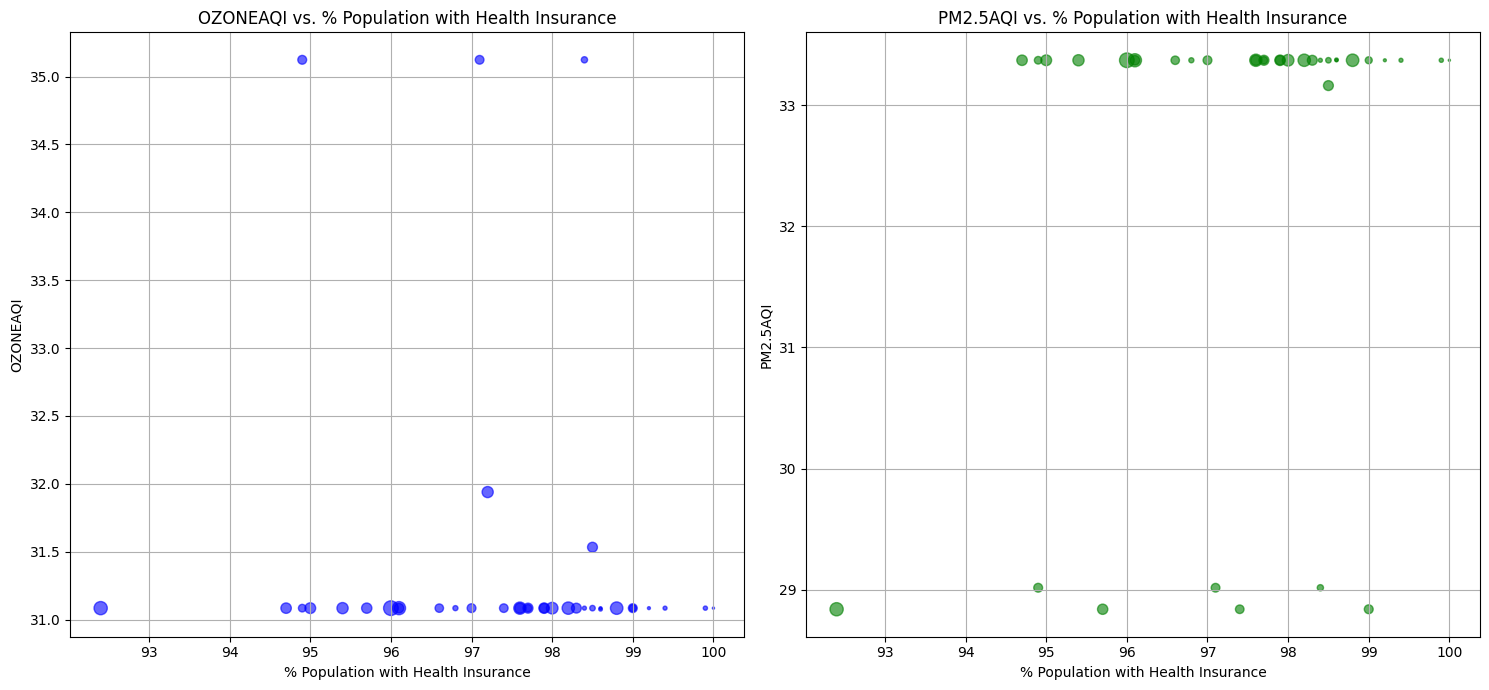

In [32]:
# Bubble plot for OZONEAQI vs Percent with health insurance coverage
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.scatter(DP03_AQI['Percent_Civilian_Noninstitutionalized_Population_with_Health_Coverage'],
            DP03_AQI['OZONEAQI'], 
            s=DP03_AQI['Estimated_Civilian_Noninstitutionalized_Population']/500, # scale size for better visualization
            color='blue', alpha=0.6)
plt.title('OZONEAQI vs. % Population with Health Insurance')
plt.xlabel('% Population with Health Insurance')
plt.ylabel('OZONEAQI')
plt.grid(True)

# Bubble plot for PM2.5AQI vs Percent with health insurance coverage
plt.subplot(1, 2, 2)
plt.scatter(DP03_AQI['Percent_Civilian_Noninstitutionalized_Population_with_Health_Coverage'],
            DP03_AQI['PM2.5AQI'], 
            s=DP03_AQI['Estimated_Civilian_Noninstitutionalized_Population']/500, # scale size for better visualization
            color='green', alpha=0.6)
plt.title('PM2.5AQI vs. % Population with Health Insurance')
plt.xlabel('% Population with Health Insurance')
plt.ylabel('PM2.5AQI')
plt.grid(True)

plt.tight_layout()
plt.show()

# MEDHA

In [161]:
## transport --> merge with AQI 

AQI_file_path = './Data/AQI/2021_Daily_Aqi_Data_Cleaned.csv'
AQI = pd.read_csv(AQI_file_path)


DP02_file_path = "./Data/Census/census_transport.csv"
DP02 = pd.read_csv(DP02_file_path)

#AQI
#Merging DP02 and AQI on zipcodes.

combined = AQI.merge(DP02, left_on='zip_code', right_on='Zipcode', how='inner')
combined.drop(columns = ['Zipcode'])

date  zip_code ReportingArea StateCode  Latitude  Longitude  \
0      2021-01-01      2045      Weymouth        MA   42.2459   -70.9628   
1      2021-01-02      2045      Weymouth        MA   42.2459   -70.9628   
2      2021-01-03      2045      Weymouth        MA   42.2459   -70.9628   
3      2021-01-04      2045      Weymouth        MA   42.2459   -70.9628   
4      2021-01-05      2045      Weymouth        MA   42.2459   -70.9628   
...           ...       ...           ...       ...       ...        ...   
13840  2021-12-27      2152       Chelsea        MA   42.3870   -71.0260   
13841  2021-12-28      2152       Chelsea        MA   42.3870   -71.0260   
13842  2021-12-29      2152       Chelsea        MA   42.3870   -71.0260   
13843  2021-12-30      2152       Chelsea        MA   42.3870   -71.0260   
13844  2021-12-31      2152       Chelsea        MA   42.3870   -71.0260   

       OZONEAQI  PM2.5AQI  PM10AQI  CategoryNumber  ...  \
0           NaN      40.0      NaN             1.0  ...   
1           NaN      17.0      NaN             1.0  ...   
2           NaN      25.0      NaN             1.0  ...   
3           NaN      28.0      NaN             1.0  ...   
4           NaN      20.0      NaN             1.0  ...   
...         ...       ...      ...             ...  ...   
13840      13.0      23.0      NaN             1.0  ...   
13841      15.0      36.0      NaN             1.0  ...   
13842      12.0      45.0      NaN             1.0  ...   
13843       3.0      55.0      NaN             1.0  ...   
13844       6.0      64.0      NaN             1.0  ...   

      Estimated_Total_Population_Commuting_to_Work_16_years_and_over_Public transportation (excluding taxicab)  \
0                                                    462                                                         
1                                                    462                                                         
2                                                    462                                                         
3                                                    462                                                         
4                                                    462                                                         
...                                                  ...                                                         
13840                                               1823                                                         
13841                                               1823                                                         
13842                                               1823                                                         
13843                                               1823                                                         
13844                                               1823                                                         

       Estimated_Total_Population_Commuting_to_Work_16_years_and_over_Walked  \
0                                                    157                       
1                                                    157                       
2                                                    157                       
3                                                    157                       
4                                                    157                       
...                                                  ...                       
13840                                                230                       
13841                                                230                       
13842                                                230                       
13843                                                230                       
13844                                                230                       

       Estimated_Total_Population_Commuting_to_Work_16_years_

In [162]:
percent_cars = combined['Percent_Total_Population_Commuting_to_Work_16_years_and_over_Car, truck, or van -- drove alone'].mean()
percent_cars

30.484449259660526

In [171]:
import pandas as pd

# Assuming 'combined' is your DataFrame containing the provided data

# Filter data for different transportation methods
car_users = combined[combined[
    'Percent_Total_Population_Commuting_to_Work_16_years_and_over_Car, truck, or van -- drove alone']
                     > 50]
public_transport_users = combined[combined[
    'Percent_Total_Population_Commuting_to_Work_16_years_and_over_Public transportation (excluding taxicab)']
                                  > 50]
walked_users = combined[combined[
    'Percent_Total_Population_Commuting_to_Work_16_years_and_over_Walked'] >
                        50]
other_means_users = combined[combined[
    'Percent_Total_Population_Commuting_to_Work_16_years_and_over_Other means']
                             > 50]
worked_from_home_users = combined[combined[
    'Percent_Total_Population_Commuting_to_Work_16_years_and_over_Worked from home']
                                  > 50]


# Display zip codes and AQI for each group
def display_group_info(group_name, group_data):
    print(f"Zip Codes of People Using {group_name}:")
    print(group_data['zip_code'].unique())
    print(f"\nAQI Values for People Using {group_name}:")
    print(group_data['PM2.5AQI'].unique()
          )  # Change 'PM2.5AQI' to the desired AQI column name


# Call the function for each group
display_group_info("Car", car_users)
display_group_info("Public Transportation", public_transport_users)
display_group_info("Walking to Work", walked_users)
display_group_info("Other Means", other_means_users)
display_group_info("Working from Home", worked_from_home_users)

Zip Codes of People Using Car:
[2045 2131 2170 2171 2152]

AQI Values for People Using Car:
[ 40.  17.  25.  28.  20.  31.  24.  45.  nan  52.  87.  68.  16.  23.
  36.  50.  51.  21.  18.  33.  14.  47.  39.  41.  35.  22.  29.  34.
  32.  27.  19.  26.  37.  30.  42.  60.  15.  55.  49.  11.  13.  12.
  38.  10.   9.  54.  46.  59.  96.  63.  44. 133.  80.  43.  53.  57.
  56.   8.  48.  58.  62.  83.   3.   7.  65. 101.  61. 145.  84.  64.]
Zip Codes of People Using Public Transportation:
[]

AQI Values for People Using Public Transportation:
[]
Zip Codes of People Using Walking to Work:
[2109 2163 2215]

AQI Values for People Using Walking to Work:
[ 39.  15.  37.  30.  29.  33.  27.  38.  56.  50.  83.  59.  24.  23.
  34.  46.  19.  25.  18.  53.  13.  16.  22.  61.  58.  51.  60.  57.
  36.  26.  35.  48.  43.  21.  28.  31.  40.  49.  20.  32.  42.  47.
  17.  44.  54.  63.  52.  62.  45.  99. 141.  79.  55.  14.  11.  41.
  12.  64.  67.]
Zip Codes of People Using Other Means:

In [172]:
import matplotlib.pyplot as plt

# Assuming you have AQI data associated with income brackets in variables first to tenth
# Replace these variables with your actual AQI data corresponding to income brackets

DP03 = pd.read_csv('./Data/Census/DP03_Cleaned.csv')
AQI_file_path = './Data/AQI/2021_Daily_Aqi_Data_Cleaned.csv'
AQI = pd.read_csv(AQI_file_path)

combine2 = AQI.merge(DP03, left_on='zip_code', right_on='Zipcode', how='inner')

# List of income range columns
income_range_columns = [
    'Percent_Total_Households_Income_and_Benefits_Less than $10,000',
    'Percent_Total_Households_Income_and_Benefits_$10,000 to $14,999',
    'Percent_Total_Households_Income_and_Benefits_$15,000 to $24,999',
    'Percent_Total_Households_Income_and_Benefits_$25,000 to $34,999',
    'Percent_Total_Households_Income_and_Benefits_$35,000 to $49,999',
    'Percent_Total_Households_Income_and_Benefits_$50,000 to $74,999',
    'Percent_Total_Households_Income_and_Benefits_$75,000 to $99,999',
    'Percent_Total_Households_Income_and_Benefits_$100,000 to $149,999',
    'Percent_Total_Households_Income_and_Benefits_$150,000 to $199,999',
    'Percent_Total_Households_Income_and_Benefits_$200,000 or more'
]

# Calculate mean AQI levels for each income bracket
mean_aqi_by_income_bracket = []
for column in income_range_columns:
    mean_aqi = combine2.loc[combine2[column] > 50, 'PM2.5AQI'].mean()
    mean_aqi_by_income_bracket.append(mean_aqi)

print(mean_aqi_by_income_bracket)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


In [173]:
DP03.head()
#add health data trends --> extension!

Zipcode  Estimated_Civilian_Noninstitutionalized_Population  \
0     2045                                              10120    
1     2108                                               4195    
2     2109                                               3508    
3     2110                                               2307    
4     2111                                               7841    

   Estimated_Civilian_Noninstitutionalized_Population_with_Health_Coverage  \
0                                               9957                         
1                                               4128                         
2                                               3460                         
3                                               2289                         
4                                               7723                         

   Estimated_Civilian_Noninstitutionalized_Population_No_Health_Coverage  \
0                                                163                       
1                                                 67                       
2                                                 48                       
3                                                 18                       
4                                                118                       

   Percent_Civilian_Noninstitutionalized_Population_with_Health_Coverage  \
0                                               98.4                       
1                                               98.4                       
2                                               98.6                       
3                                               99.2                       
4                                               98.5                       

   Percent_Civilian_Noninstitutionalized_Population_No_Health_Coverage  \
0                                                1.6                     
1                                                1.6                     
2                                                1.4                     
3                                                0.8                     
4                                                1.5                     

   Estimated_Total_Population_Commuting_to_Work_16_years_and_over  \
0                                               6055                
1                                               2081                
2                                               2605                
3                                               1154                
4                                               3715                

   Estimated_Total_Population_Commuting_to_Work_16_years_and_over_Car, truck, or van -- drove alone  \
0                                               4369                                                  
1                                                190                                                  
2                                                383                                                  
3                                                294                                                  
4                                                514                                                  

   Estimated_Total_Population_Commuting_to_Work_16_years_and_over_Car, truck, or van -- carpooled  \
0                                                336                                                
1                                                 40                                                
2                                                 10                                                
3                                                 18                                                
4                                                 84                                                

   Estimated_Total_Population_Commuting_to_Work_16_years_and_over_Public transportation (excluding taxicab)  \
0                         

# MAX

# Population Density

   Zipcode  Estimated_Total_Population   PM2.5AQI   OZONEAQI  ShapeSTArea  \
0     2108                        4225  33.369863  31.083799     0.221037   
1     2109                        3627  33.373626  31.075630     0.198603   
2     2110                        2307  33.369863  31.083799     0.238080   
3     2111                        7841  33.369863  31.083799     0.280640   
4     2113                        6726  33.369863  31.083799     0.100699   

        Density  
0  19114.442841  
1  18262.553856  
2   9690.018858  
3  27939.662949  
4  66793.029348  


/var/folders/wb/xzynz9w52kgcmqngk1sh79p40000gn/T/ipykernel_13304/2244878796.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



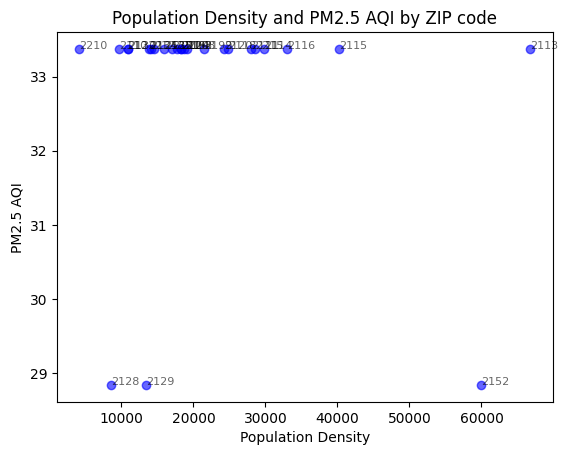

In [157]:
import pandas as pd

population_df = pd.read_csv('./Data/Census/DP05_Cleaned.csv')
aqi_df = pd.read_csv('./Data/AQI/2021_Avg_Aqi_Data_Cleaned.csv')
zipcode_df = pd.read_csv('./Data/Census/ZIP_Codes.csv')
zipcode_df = zipcode_df.drop(columns=['ShapeSTLength'])
zipcode_df['ShapeSTArea'] = zipcode_df[
    'ShapeSTArea'] * 0.0000000358701  #converting area in square feet to square miles

zip_code

merged_df = pd.merge(population_df,
                     aqi_df,
                     left_on='Zipcode',
                     right_on="zip_code",
                     how='inner')
merged_df = pd.merge(merged_df, zipcode_df, on='Zipcode', how='inner')
population_aqi = merged_df[[
    'Zipcode', 'Estimated_Total_Population', 'PM2.5AQI', 'OZONEAQI',
    'ShapeSTArea'
]]
population_aqi['Density'] = population_aqi[
    'Estimated_Total_Population'] / population_aqi['ShapeSTArea']
print(population_aqi.head())

# Define independent variable (population) and dependent variable (air quality)
X = merged_df['Estimated_Total_Population']
y = merged_df['PM2.5AQI']  # Replace with the actual column name
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'population_aqi' with columns 'Zipcode', 'Density', and 'PM2.5AQI'
zipcode = population_aqi['Zipcode']
density = population_aqi['Density']
pm25_aqi = population_aqi['PM2.5AQI']

# Create a scatter plot
plt.scatter(density, pm25_aqi, color='blue', alpha=0.6)

# Add labels for each point
for i, code in enumerate(zipcode):
    plt.annotate(code, (density[i], pm25_aqi[i]), fontsize=8, alpha=0.6)

# Set labels and title
plt.xlabel('Population Density')
plt.ylabel('PM2.5 AQI')
plt.title('Population Density and PM2.5 AQI by ZIP code')

# Display the plot
plt.show()

# Housing Density

   Zipcode  Estimated_Total_Housing_Units   PM2.5AQI   OZONEAQI  ShapeSTArea  \
0     2108                           2311  33.369863  31.083799     0.221037   
1     2109                           2727  33.373626  31.075630     0.198603   
2     2110                           1641  33.369863  31.083799     0.238080   
3     2111                           4515  33.369863  31.083799     0.280640   
4     2113                           4600  33.369863  31.083799     0.100699   

        Density  
0  10455.260924  
1  13730.902775  
2   6892.640202  
3  16088.200257  
4  45680.632620  


/var/folders/wb/xzynz9w52kgcmqngk1sh79p40000gn/T/ipykernel_13304/382893555.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



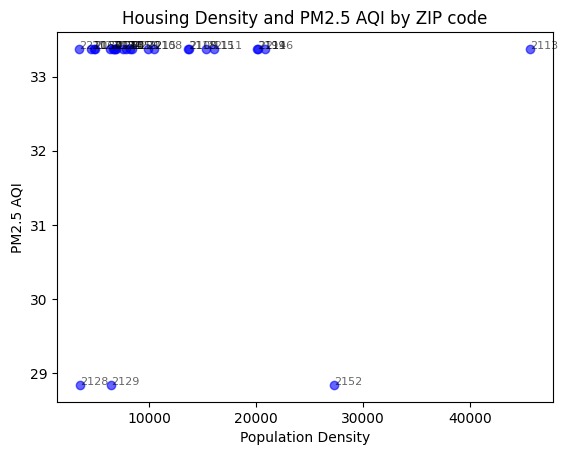

In [160]:
housing_df = pd.read_csv('./Data/Census/DP04_Cleaned.csv')
aqi_df = pd.read_csv('./Data/AQI/2021_Avg_Aqi_Data_Cleaned.csv')
zipcode_df = pd.read_csv('./Data/Census/ZIP_Codes.csv')
zipcode_df = zipcode_df.drop(columns=['ShapeSTLength'])
zipcode_df['ShapeSTArea'] = zipcode_df[
    'ShapeSTArea'] * 0.0000000358701  #converting area in square feet to square miles

merged_df = pd.merge(housing_df,
                     aqi_df,
                     left_on='Zipcode',
                     right_on="zip_code",
                     how='inner')
merged_df = pd.merge(merged_df, zipcode_df, on='Zipcode', how='inner')
housing_aqi = merged_df[[
    'Zipcode', 'Estimated_Total_Housing_Units', 'PM2.5AQI', 'OZONEAQI',
    'ShapeSTArea'
]]
housing_aqi['Density'] = housing_aqi[
    'Estimated_Total_Housing_Units'] / housing_aqi['ShapeSTArea']
print(housing_aqi.head())

zipcode = housing_aqi['Zipcode']
density = housing_aqi['Density']
pm25_aqi = housing_aqi['PM2.5AQI']

# Create a scatter plot
plt.scatter(density, pm25_aqi, color='blue', alpha=0.6)
for i, code in enumerate(zipcode):
    plt.annotate(code, (density[i], pm25_aqi[i]), fontsize=8, alpha=0.6)

# Set labels and title
plt.xlabel('Population Density')
plt.ylabel('PM2.5 AQI')
plt.title('Housing Density and PM2.5 AQI by ZIP code')

# Display the plot
plt.show()

# CAN

In [100]:
merged_data_can = pd.read_csv('./Data/Merged_AQI_DP/AQI_DP2_3_4_5.csv')
merged_data_can.columns[:32]
merged_data_can.columns[-15:]

Index(['Estimated_Total_population_Not_Hispanic_or_Latino_Asian alone',
       'Estimated_Total_population_Not_Hispanic_or_Latino_Native Hawaiian and Other Pacific Islander alone',
       'Estimated_Total_population_Not_Hispanic_or_Latino_Some other race alone',
       'Estimated_Total_population_Not_Hispanic_or_Latino_Two or more races',
       'Percent_Total_population_Hispanic_or_Latino_Other Hispanic or Latino',
       'Percent_Total_population_Hispanic_or_Latino_Cuban',
       'Percent_Total_population_Hispanic_or_Latino_Puerto Rican',
       'Percent_Total_population_Hispanic_or_Latino_Mexican',
       'Percent_Total_population_Not_Hispanic_or_Latino_White alone',
       'Percent_Total_population_Not_Hispanic_or_Latino_Black or African American alone',
       'Percent_Total_population_Not_Hispanic_or_Latino_American Indian and Alaska Native alone',
       'Percent_Total_population_Not_Hispanic_or_Latino_Asian alone',
       'Percent_Total_population_Not_Hispanic_or_Latino_Native 

In [101]:
percent_races_can = [
    'Zipcode', 'OZONEAQI', 'PM2.5AQI', 'Percent_Total_Population_Native',
    'Percent_Total_Population_Native_Born in United States',
    'Percent_Total_Population_Native_Born in Puerto Rico, U.S. Island areas, or born abroad to American parent(s)',
    'Percent_Total_Population_Foreign born',
    'Percent_Foreign_Born_U.S._Citizenship_Status_Naturalized_US_cizitzen',
    'Percent_Foreign_Born_U.S._Citizenship_Status_Not a U.S. citizen',
    'Percent_Foreign_Born_World_Wide_Europe',
    'Percent_Foreign_Born_World_Wide_Asia ',
    'Percent_Foreign_Born_World_Wide_Africa',
    'Percent_Foreign_Born_World_Wide_Oceania',
    'Percent_Foreign_Born_World_Wide_Latin America',
    'Percent_Foreign_Born_World_Wide_Northern America',
    'Percent_Total_population_Hispanic_or_Latino_Other Hispanic or Latino',
    'Percent_Total_population_Hispanic_or_Latino_Cuban',
    'Percent_Total_population_Hispanic_or_Latino_Puerto Rican',
    'Percent_Total_population_Hispanic_or_Latino_Mexican',
    'Percent_Total_population_Not_Hispanic_or_Latino_White alone',
    'Percent_Total_population_Not_Hispanic_or_Latino_Black or African American alone',
    'Percent_Total_population_Not_Hispanic_or_Latino_American Indian and Alaska Native alone',
    'Percent_Total_population_Not_Hispanic_or_Latino_Asian alone',
    'Percent_Total_population_Not_Hispanic_or_Latino_Native Hawaiian and Other Pacific Islander alone',
    'Percent_Total_population_Not_Hispanic_or_Latino_Some other race alone',
    'Percent_Total_population_Not_Hispanic_or_Latino_Two or more races'
]

# For Demographic and Housing Estimates
First, I will do my analysis in a broad look by comparing native and foreign born...

## Natives vs. Foreigns

In [102]:
df_foreign_native = merged_data_can[[
    'Zipcode', 'OZONEAQI', 'PM2.5AQI', 'Percent_Total_Population_Native',
    'Percent_Total_Population_Foreign born'
]]

df_foreign_native.head()

Zipcode   OZONEAQI   PM2.5AQI  Percent_Total_Population_Native  \
0     2045  35.123636  29.016807                             94.5   
1     2108  31.083799  33.369863                             84.6   
2     2109  31.075630  33.373626                             84.9   
3     2110  31.083799  33.369863                             78.8   
4     2111  31.083799  33.369863                             54.0   

   Percent_Total_Population_Foreign born  
0                                    5.5  
1                                   15.4  
2                                   15.1  
3                                   21.2  
4                                   46.0

In [103]:
print(
    f"The range of Ozone levels is: {np.round(df_foreign_native['OZONEAQI'].min(),decimals=3)}-{np.round(df_foreign_native['OZONEAQI'].max(),decimals=3)}"
)

print(
    f"The range of pm levels is: {np.round(df_foreign_native['PM2.5AQI'].min(),decimals=3)}-{np.round(df_foreign_native['PM2.5AQI'].max(),decimals=3)}"
)

The range of Ozone levels is: 31.076-35.124
The range of pm levels is: 28.839-33.374


In [104]:
df_foreign_native['Is_Native_Majority'] = df_foreign_native[
    'Percent_Total_Population_Native'].apply(lambda x: True
                                             if x > 50.0 else False)
df_foreign_native.head()

/var/folders/wb/xzynz9w52kgcmqngk1sh79p40000gn/T/ipykernel_13304/2728295891.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Zipcode   OZONEAQI   PM2.5AQI  Percent_Total_Population_Native  \
0     2045  35.123636  29.016807                             94.5   
1     2108  31.083799  33.369863                             84.6   
2     2109  31.075630  33.373626                             84.9   
3     2110  31.083799  33.369863                             78.8   
4     2111  31.083799  33.369863                             54.0   

   Percent_Total_Population_Foreign born  Is_Native_Majority  
0                                    5.5                True  
1                                   15.4                True  
2                                   15.1                True  
3                                   21.2                True  
4                                   46.0                True

In [105]:
df_foreign_native['OZONEAQI'].value_counts()

OZONEAQI
31.083799    32
35.123636     3
31.075630     1
31.938953     1
31.532738     1
Name: count, dtype: int64

In [106]:
df_foreign_native['PM2.5AQI'].value_counts()

PM2.5AQI
33.369863    28
28.839335     4
29.016807     3
33.373626     1
33.160819     1
Name: count, dtype: int64

In [107]:
df_foreign_native['Is_Native_Majority'].values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

As can be seen above, and as expected, natives prevail the population in each zipcode. So we can't make an analysis as such that the the ozone level is high at places where natives or foreigns are the majority. Hence, we need to use other variables to do further analysis.

In [108]:
rows_with_highestozons=df_foreign_native[df_foreign_native['OZONEAQI']==df_foreign_native['OZONEAQI'].max()]
rows_with_highestozons

rows_with_highest_pm=df_foreign_native[df_foreign_native['PM2.5AQI']==df_foreign_native['PM2.5AQI'].max()]
rows_with_highest_pm

Zipcode  OZONEAQI   PM2.5AQI  Percent_Total_Population_Native  \
2     2109  31.07563  33.373626                             84.9   

   Percent_Total_Population_Foreign born  Is_Native_Majority  
2                                   15.1                True

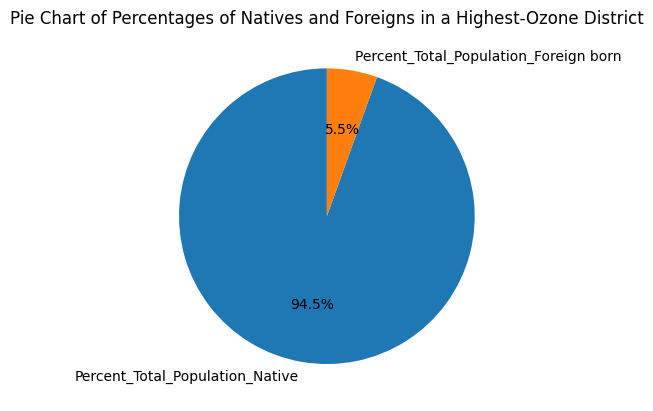

In [109]:
foreign_native_row_highestozon1 = np.array([
    rows_with_highestozons['Percent_Total_Population_Native'].iloc[0],
    rows_with_highestozons['Percent_Total_Population_Foreign born'].iloc[0]
])
foreign_native_row_highestozon2 = np.array([
    rows_with_highestozons['Percent_Total_Population_Native'].iloc[1],
    rows_with_highestozons['Percent_Total_Population_Foreign born'].iloc[1]
])
foreign_native_row_highestozon3 = np.array([
    rows_with_highestozons['Percent_Total_Population_Native'].iloc[2],
    rows_with_highestozons['Percent_Total_Population_Foreign born'].iloc[2]
])
foreign_native_labels = [
    'Percent_Total_Population_Native', 'Percent_Total_Population_Foreign born'
]

plt.pie(foreign_native_row_highestozon1,
        labels=foreign_native_labels,
        autopct='%1.1f%%',
        startangle=90)
plt.title(
    'Pie Chart of Percentages of Natives and Foreigns in a Highest-Ozone District'
)
plt.show()

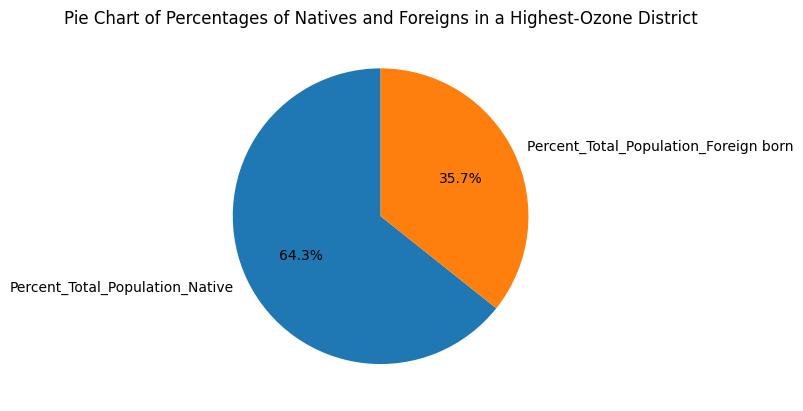

In [110]:
plt.pie(foreign_native_row_highestozon2, labels=foreign_native_labels, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Percentages of Natives and Foreigns in a Highest-Ozone District')
plt.show()

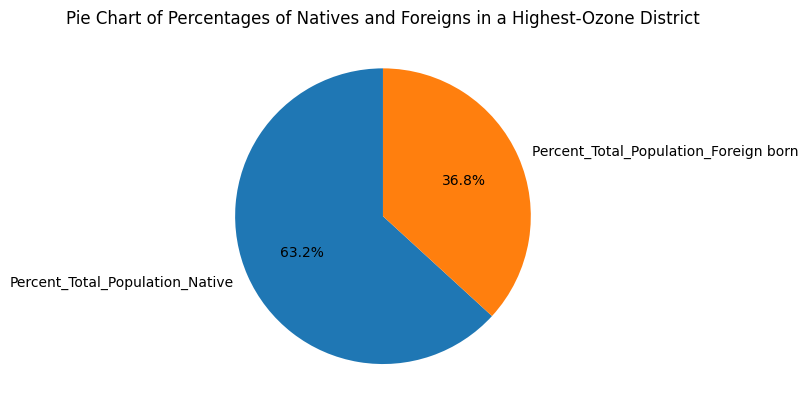

In [111]:
plt.pie(foreign_native_row_highestozon3, labels=foreign_native_labels, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Percentages of Natives and Foreigns in a Highest-Ozone District')
plt.show()

In [112]:
rows_with_lowestozons=df_foreign_native[df_foreign_native['OZONEAQI']==df_foreign_native['OZONEAQI'].min()]
rows_with_lowestozons

Zipcode  OZONEAQI   PM2.5AQI  Percent_Total_Population_Native  \
2     2109  31.07563  33.373626                             84.9   

   Percent_Total_Population_Foreign born  Is_Native_Majority  
2                                   15.1                True

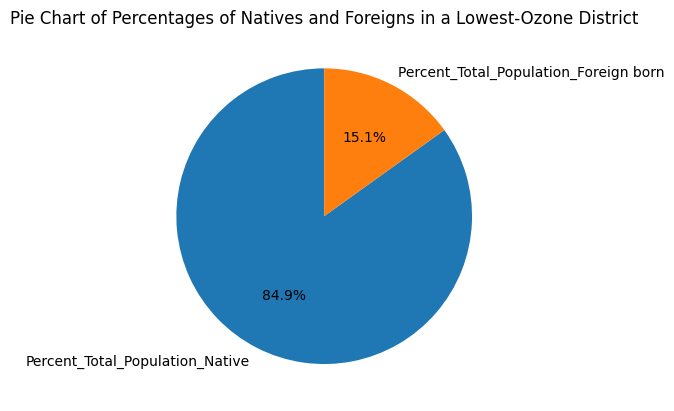

In [113]:
rows_with_lowestozon1=np.array([rows_with_lowestozons['Percent_Total_Population_Native'].iloc[0], rows_with_lowestozons['Percent_Total_Population_Foreign born'].iloc[0]])

plt.pie(rows_with_lowestozon1, labels=foreign_native_labels, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Percentages of Natives and Foreigns in a Lowest-Ozone District')
plt.show()

But the same thing applies for the district with lowest ozone level.

The highest pm level is probed in the district in which the percentage of the natives is much higher than foriegns:

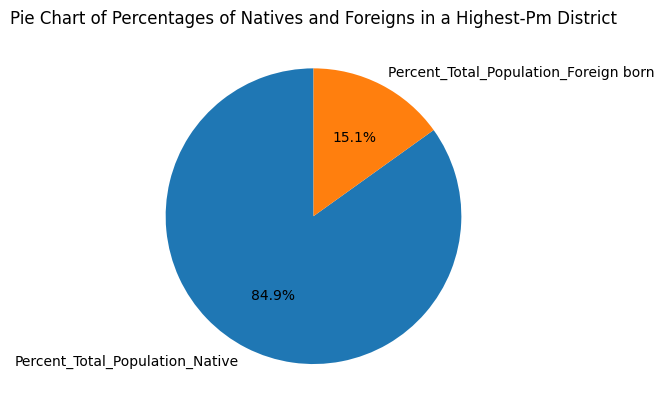

In [114]:
foreign_native_row_highestpm=np.array([rows_with_highest_pm['Percent_Total_Population_Native'].iloc[0], rows_with_highest_pm['Percent_Total_Population_Foreign born'].iloc[0]])
plt.pie(foreign_native_row_highestpm, labels=foreign_native_labels, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Percentages of Natives and Foreigns in a Highest-Pm District')
plt.show()

In [115]:
rows_with_lowestpm=df_foreign_native[df_foreign_native['PM2.5AQI']==df_foreign_native['PM2.5AQI'].min()]
rows_with_lowestpm

Zipcode   OZONEAQI   PM2.5AQI  Percent_Total_Population_Native  \
17     2128  31.083799  28.839335                             53.8   
18     2129  31.083799  28.839335                             83.9   
30     2145  31.083799  28.839335                             66.2   
31     2152  31.083799  28.839335                             82.4   

    Percent_Total_Population_Foreign born  Is_Native_Majority  
17                                   46.2                True  
18                                   16.1                True  
30                                   33.8                True  
31                                   17.6                True

Without the need of pie charts, we can spot that the conclusion is the same.

But what we can further do is we can take the averages of the rows and for Percent_Total_Population_Native column and Percent_Total_Population_Foreign born column and observe the population ratio.

## For Ozon Metric

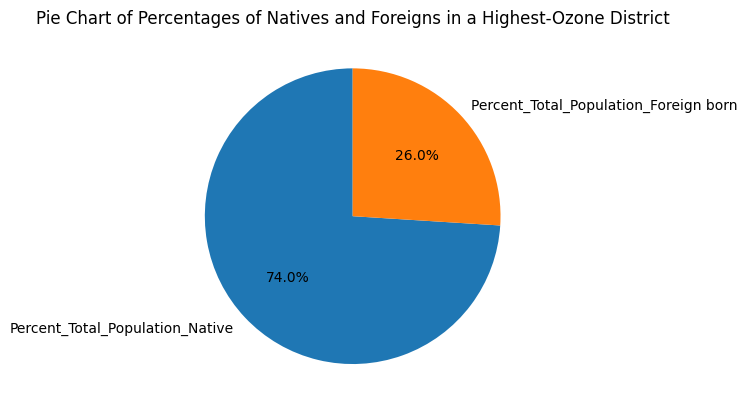

In [116]:
ozone_max_means=[rows_with_highestozons['Percent_Total_Population_Native'].mean(axis=0),rows_with_highestozons['Percent_Total_Population_Foreign born'].mean(axis=0)]
plt.pie(ozone_max_means, labels=foreign_native_labels, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Percentages of Natives and Foreigns in a Highest-Ozone District')
plt.show()

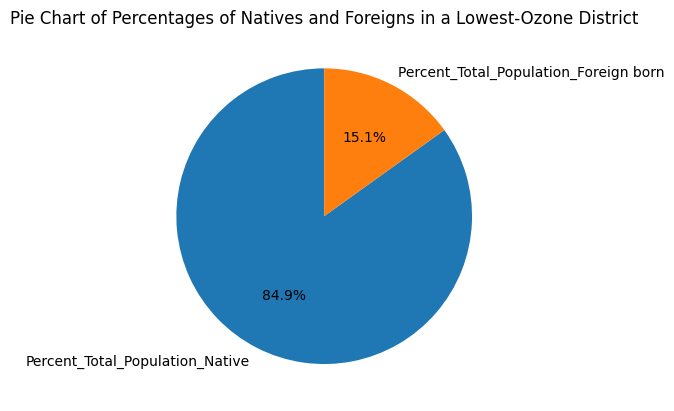

In [117]:
plt.pie(rows_with_lowestozon1, labels=foreign_native_labels, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Percentages of Natives and Foreigns in a Lowest-Ozone District')
plt.show()

Therefore, we can observe that as percent of foreign population increases the air quality gets worse by looking at ozone metric.

## For PM Metric

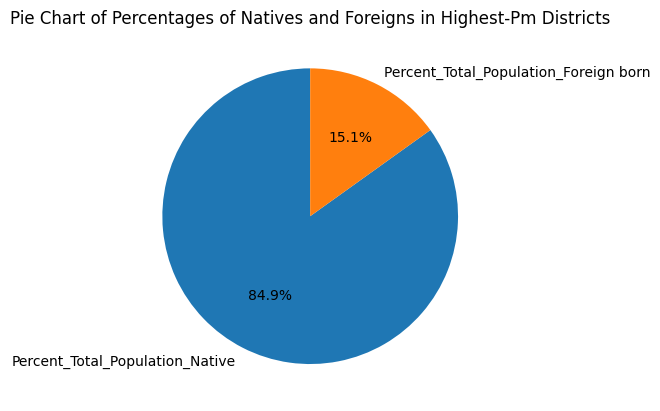

In [118]:
plt.pie(foreign_native_row_highestpm, labels=foreign_native_labels, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Percentages of Natives and Foreigns in Highest-Pm Districts')
plt.show()

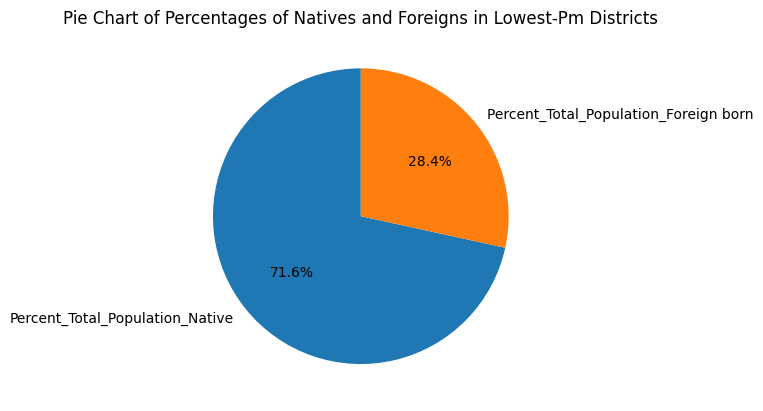

In [119]:
pm_min_means=[rows_with_lowestpm['Percent_Total_Population_Native'].mean(axis=0),rows_with_lowestpm['Percent_Total_Population_Foreign born'].mean(axis=0)]
plt.pie(pm_min_means, labels=foreign_native_labels, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Percentages of Natives and Foreigns in Lowest-Pm Districts')
plt.show()

Different conclusion made with ozone metric: as percent of foreign population increases the air quality gets better by looking at pm metric.

### So we can't make a consistent analysis using columns for Natives and Foreigns!!!

### There are 23 columns that represents an ethnicity or race. But we can't compare all of these columns since some set of columns are subset of another column. So comparing dependent columns would not yield an accurate analysis.
For example, we can't compare the set of columns where these columns are inside this set 'Percent_Foreign_Born_World_Wide_Europe', 'Percent_Foreign_Born_World_Wide_Latin America', 'Percent_Total_population_Hispanic_or_Latino_Mexican', 'Percent_Total_population_Not_Hispanic_or_Latino_White alone'. This is because 'Percent_Total_population_Hispanic_or_Latino_Mexican' and 'Percent_Total_population_Not_Hispanic_or_Latino_White form a subset of 'Percent_Foreign_Born_World_Wide_Latin America'.

### Here are the comparisions of independent columns, or in other words columns whose values sum up to 100%:

## For Hispanics and non-Hispanics

In [120]:
independent_columns1=['Zipcode', 'OZONEAQI', 'PM2.5AQI']

independent_columns1_hispanic=['Percent_Total_population_Hispanic_or_Latino_Other Hispanic or Latino',
 'Percent_Total_population_Hispanic_or_Latino_Cuban',
 'Percent_Total_population_Hispanic_or_Latino_Puerto Rican',
 'Percent_Total_population_Hispanic_or_Latino_Mexican']

independent_columns1_not_hispanic= ['Percent_Total_population_Not_Hispanic_or_Latino_White alone',
 'Percent_Total_population_Not_Hispanic_or_Latino_Black or African American alone',
 'Percent_Total_population_Not_Hispanic_or_Latino_American Indian and Alaska Native alone',
 'Percent_Total_population_Not_Hispanic_or_Latino_Asian alone',
 'Percent_Total_population_Not_Hispanic_or_Latino_Native Hawaiian and Other Pacific Islander alone',
 'Percent_Total_population_Not_Hispanic_or_Latino_Some other race alone',
 'Percent_Total_population_Not_Hispanic_or_Latino_Two or more races']

merged_data_can[independent_columns1+independent_columns1_hispanic+independent_columns1_not_hispanic].head()

Zipcode   OZONEAQI   PM2.5AQI  \
0     2045  35.123636  29.016807   
1     2108  31.083799  33.369863   
2     2109  31.075630  33.373626   
3     2110  31.083799  33.369863   
4     2111  31.083799  33.369863   

   Percent_Total_population_Hispanic_or_Latino_Other Hispanic or Latino  \
0                                                0.7                      
1                                                3.7                      
2                                                1.6                      
3                                                2.7                      
4                                                6.1                      

   Percent_Total_population_Hispanic_or_Latino_Cuban  \
0                                                0.0   
1                                                0.3   
2                                                0.0   
3                                                0.0   
4                                                0.0   

   Percent_Total_population_Hispanic_or_Latino_Puerto Rican  \
0                                                0.1          
1                                                3.0          
2                                                0.0          
3                                                0.0          
4                                                1.7          

   Percent_Total_population_Hispanic_or_Latino_Mexican  \
0                                                0.2     
1                                                0.0     
2                                                0.0     
3                                                0.0     
4                                                1.0     

   Percent_Total_population_Not_Hispanic_or_Latino_White alone  \
0                                               95.3             
1                                               80.4             
2                                               85.7             
3                                               87.9             
4                                               37.5             

   Percent_Total_population_Not_Hispanic_or_Latino_Black or African American alone  \
0                                                0.3                                 
1                                                4.9                                 
2                                                0.7                                 
3                                                2.2                                 
4                                                1.9                                 

   Percent_Total_population_Not_Hispanic_or_Latino_American Indian and Alaska Native alone  \
0                                                0.0                                         
1                                                0.0                                         
2                                                0.0                                         
3                                                0.0                                         
4                                                0.3                                         

   Percent_Total_population_Not_Hispanic_or_Latino_Asian alone  \
0                                                1.4             
1                                                5.2             
2                                                8.6             
3                                                4.3             
4                                               47.9             

   Percent_Total_population_Not_Hispanic_or_Latino_Native Hawaiian and Other Pacific Islander alone  \
0                                                0.0                                                  
1                                                0.0                                                  
2                                                0.0                                 

In [121]:
df_comparision1=pd.DataFrame()
df_comparision1=merged_data_can[independent_columns1]
df_comparision1['Percent_Total_population_Hispanic']= merged_data_can[independent_columns1_hispanic].sum(axis=1)
df_comparision1['Percent_Total_population_Not_Hispanic_Latino']= merged_data_can[independent_columns1_not_hispanic].sum(axis=1)


df_comparision1.head()

/var/folders/wb/xzynz9w52kgcmqngk1sh79p40000gn/T/ipykernel_13304/2789424205.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/wb/xzynz9w52kgcmqngk1sh79p40000gn/T/ipykernel_13304/2789424205.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Zipcode   OZONEAQI   PM2.5AQI  Percent_Total_population_Hispanic  \
0     2045  35.123636  29.016807                                1.0   
1     2108  31.083799  33.369863                                7.0   
2     2109  31.075630  33.373626                                1.6   
3     2110  31.083799  33.369863                                2.7   
4     2111  31.083799  33.369863                                8.8   

   Percent_Total_population_Not_Hispanic_Latino  
0                                          98.9  
1                                          93.0  
2                                          98.4  
3                                          97.3  
4                                          91.2

## For Ozone Metric

In [122]:
rows_with_highestozons1=df_comparision1[df_comparision1['OZONEAQI']==df_comparision1['OZONEAQI'].max()]
rows_with_highestozons1

Zipcode   OZONEAQI   PM2.5AQI  Percent_Total_population_Hispanic  \
0      2045  35.123636  29.016807                                1.0   
33     2170  35.123636  29.016807                                3.0   
34     2171  35.123636  29.016807                                4.1   

    Percent_Total_population_Not_Hispanic_Latino  
0                                           98.9  
33                                          96.9  
34                                          96.0

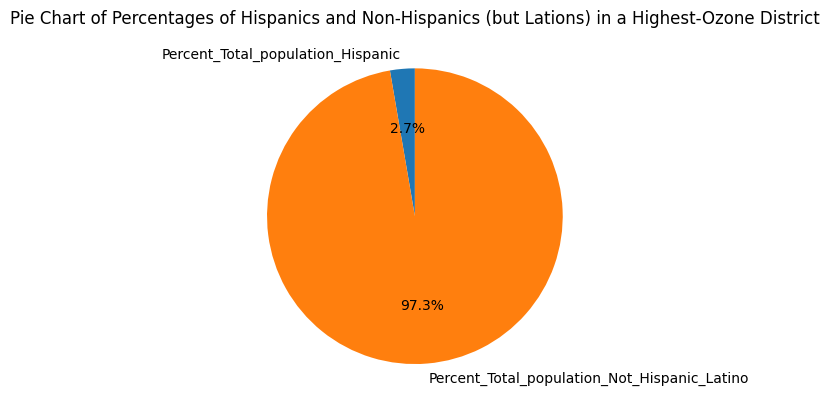

In [123]:
ozone_max_means1=[rows_with_highestozons1['Percent_Total_population_Hispanic'].mean(axis=0),rows_with_highestozons1['Percent_Total_population_Not_Hispanic_Latino'].mean(axis=0)]

hispanic_nothispanic_labels= ['Percent_Total_population_Hispanic','Percent_Total_population_Not_Hispanic_Latino']
plt.pie(ozone_max_means1, labels=hispanic_nothispanic_labels, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Percentages of Hispanics and Non-Hispanics (but Lations) in a Highest-Ozone District')
plt.show()

In [124]:
rows_with_lowestozons1=df_comparision1[df_comparision1['OZONEAQI']==df_comparision1['OZONEAQI'].min()]
rows_with_lowestozons1

Zipcode  OZONEAQI   PM2.5AQI  Percent_Total_population_Hispanic  \
2     2109  31.07563  33.373626                                1.6   

   Percent_Total_population_Not_Hispanic_Latino  
2                                          98.4

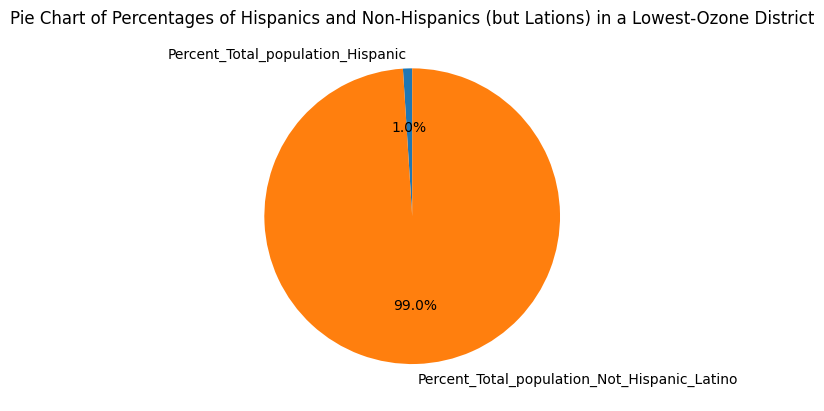

In [125]:
row_lowestozon=np.array([rows_with_highestozons1['Percent_Total_population_Hispanic'].iloc[0], rows_with_highestozons1['Percent_Total_population_Not_Hispanic_Latino'].iloc[0]])

plt.pie(row_lowestozon, labels=hispanic_nothispanic_labels, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Percentages of Hispanics and Non-Hispanics (but Lations) in a Lowest-Ozone District')
plt.show()

Therefore, we can observe that as the percent of Hispanic population increases the air quality gets worse by looking at ozone metric.

## For PM metric

In [126]:
rows_with_highestpm1=df_comparision1[df_comparision1['PM2.5AQI']==df_comparision1['PM2.5AQI'].max()]
rows_with_highestpm1

Zipcode  OZONEAQI   PM2.5AQI  Percent_Total_population_Hispanic  \
2     2109  31.07563  33.373626                                1.6   

   Percent_Total_population_Not_Hispanic_Latino  
2                                          98.4

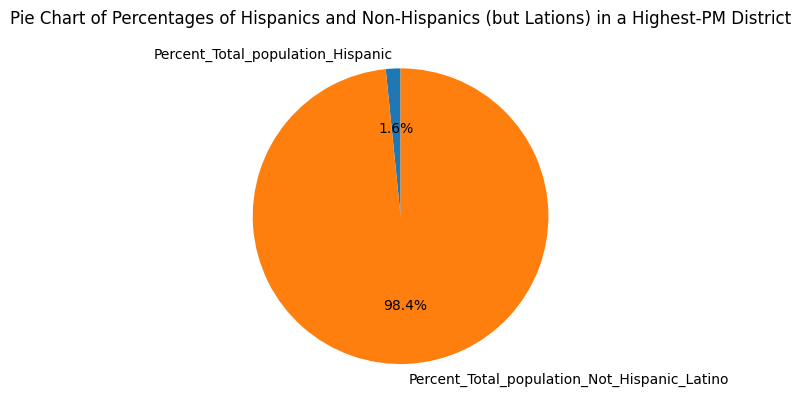

In [127]:
pm_max_means1=[rows_with_highestpm1['Percent_Total_population_Hispanic'].mean(axis=0),rows_with_highestpm1['Percent_Total_population_Not_Hispanic_Latino'].mean(axis=0)]

plt.pie(pm_max_means1, labels=hispanic_nothispanic_labels, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Percentages of Hispanics and Non-Hispanics (but Lations) in a Highest-PM District')
plt.show()

In [128]:
rows_with_lowestpm1=df_comparision1[df_comparision1['PM2.5AQI']==df_comparision1['PM2.5AQI'].min()]
rows_with_lowestpm1


Zipcode   OZONEAQI   PM2.5AQI  Percent_Total_population_Hispanic  \
17     2128  31.083799  28.839335                               55.5   
18     2129  31.083799  28.839335                                9.2   
30     2145  31.083799  28.839335                               22.7   
31     2152  31.083799  28.839335                               13.4   

    Percent_Total_population_Not_Hispanic_Latino  
17                                          44.4  
18                                          91.0  
30                                          77.4  
31                                          86.6

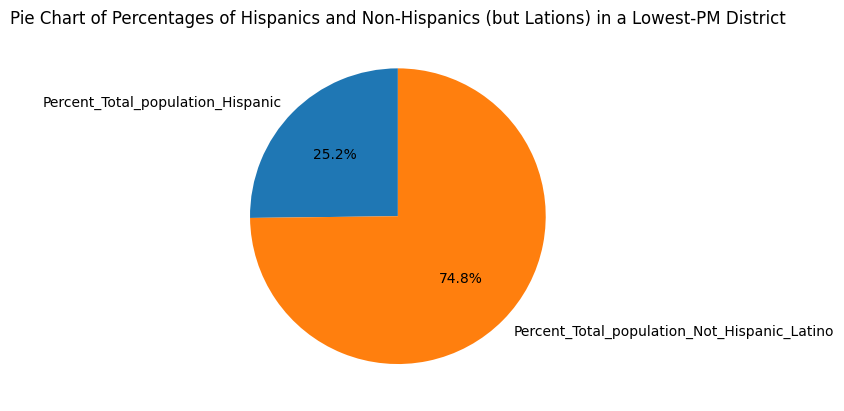

In [129]:
pm_min_means1=[rows_with_lowestpm1['Percent_Total_population_Hispanic'].mean(axis=0),rows_with_lowestpm1['Percent_Total_population_Not_Hispanic_Latino'].mean(axis=0)]
plt.pie(pm_min_means1, labels=hispanic_nothispanic_labels, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Percentages of Hispanics and Non-Hispanics (but Lations) in a Lowest-PM District')
plt.show()

Different conclusion made with ozone metric: we can observe that as the percent of Hispanic population increases the air quality gets better by looking at ozone metric.

# Air quality based on Median Income

In [130]:
income_columns=["Percent_Total_Households_Income_and_Benefits_Less than $10,000",
"Percent_Total_Households_Income_and_Benefits_$10,000 to $14,999",
"Percent_Total_Households_Income_and_Benefits_$15,000 to $24,999",
"Percent_Total_Households_Income_and_Benefits_$25,000 to $34,999",
"Percent_Total_Households_Income_and_Benefits_$35,000 to $49,999",
"Percent_Total_Households_Income_and_Benefits_$50,000 to $74,999",
"Percent_Total_Households_Income_and_Benefits_$75,000 to $99,999",
"Percent_Total_Households_Income_and_Benefits_$100,000 to $149,999",
"Percent_Total_Households_Income_and_Benefits_$150,000 to $199,999",
"Percent_Total_Households_Income_and_Benefits_$200,000 or more"]

base_columns=['Zipcode', 'OZONEAQI', 'PM2.5AQI']

In [131]:
df_income= merged_data_can[base_columns + income_columns]
df_income.head()

Zipcode   OZONEAQI   PM2.5AQI  \
0     2045  35.123636  29.016807   
1     2108  31.083799  33.369863   
2     2109  31.075630  33.373626   
3     2110  31.083799  33.369863   
4     2111  31.083799  33.369863   

   Percent_Total_Households_Income_and_Benefits_Less than $10,000  \
0                                                3.7                
1                                                5.0                
2                                                2.4                
3                                               10.9                
4                                               15.8                

   Percent_Total_Households_Income_and_Benefits_$10,000 to $14,999  \
0                                                1.1                 
1                                                7.7                 
2                                                2.1                 
3                                                2.7                 
4                                                7.5                 

   Percent_Total_Households_Income_and_Benefits_$15,000 to $24,999  \
0                                                4.3                 
1                                                0.6                 
2                                                4.0                 
3                                                3.4                 
4                                                7.6                 

   Percent_Total_Households_Income_and_Benefits_$25,000 to $34,999  \
0                                                4.7                 
1                                                2.8                 
2                                                2.1                 
3                                                4.8                 
4                                                6.1                 

   Percent_Total_Households_Income_and_Benefits_$35,000 to $49,999  \
0                                                5.8                 
1                                                2.7                 
2                                                2.0                 
3                                                1.2                 
4                                                8.7                 

   Percent_Total_Households_Income_and_Benefits_$50,000 to $74,999  \
0                                               12.8                 
1                                               10.8                 
2                                               10.5                 
3                                               10.5                 
4                                                8.8                 

   Percent_Total_Households_Income_and_Benefits_$75,000 to $99,999  \
0                                               10.0                 
1                                                4.8                 
2                                                7.4                 
3                                                4.4                 
4                                                6.3                 

   Percent_Total_Households_Income_and_Benefits_$100,000 to $149,999  \
0                                               24.6                   
1                                               14.8                   
2                                               18.5                   
3                                               14.6                   
4                                                8.3                   

   Percent_Total_Households_Income_and_Benefits_$150,000 to $199,999  \
0                                                9.5                   
1                                               11.8                   
2                                               18.8                   
3                                                5.7                   
4                                                5.3

## For Ozone Metric:

In [132]:
df_income.groupby(by="OZONEAQI").groups.keys()

dict_keys([31.07563025210084, 31.083798882681563, 31.53273809523809, 31.938953488372093, 35.123636363636365])

In [133]:
ozone_levels=list(df_income.groupby(by="OZONEAQI").groups.keys())
ozone_levels.sort()
ozone_levels


[31.07563025210084,
 31.083798882681563,
 31.53273809523809,
 31.938953488372093,
 35.123636363636365]

In [134]:
ozone_row1=df_income.groupby(by="OZONEAQI").get_group(ozone_levels[0])
ozone_row2=df_income.groupby(by="OZONEAQI").get_group(ozone_levels[1])
ozone_row3=df_income.groupby(by="OZONEAQI").get_group(ozone_levels[2])
ozone_row4=df_income.groupby(by="OZONEAQI").get_group(ozone_levels[3])
ozone_row5=df_income.groupby(by="OZONEAQI").get_group(ozone_levels[4])


ozone_rows=[ozone_row1,ozone_row2,ozone_row3,ozone_row4,ozone_row5]
income_levels_population_percents=[[0 for _ in range(5)] for _ in range(10)]

for x in range(len(ozone_rows)):
    for y in range(len(income_columns)):
        
        row=ozone_rows[x]
        
        income_levels_population_percents[y][x]= row[income_columns[y]].mean()
        
        
income_levels_population_percents= list(np.array(income_levels_population_percents).reshape(5,10))

income_levels_population_percents= [list(x) for x in income_levels_population_percents]


for x in range(len(ozone_levels)):
    income_levels_population_percents[x] += [np.round(ozone_levels[x],decimals=3)]

<Axes: title={'center': 'Grouped Bar Graph with dataframe'}, xlabel='Ozone_Level'>

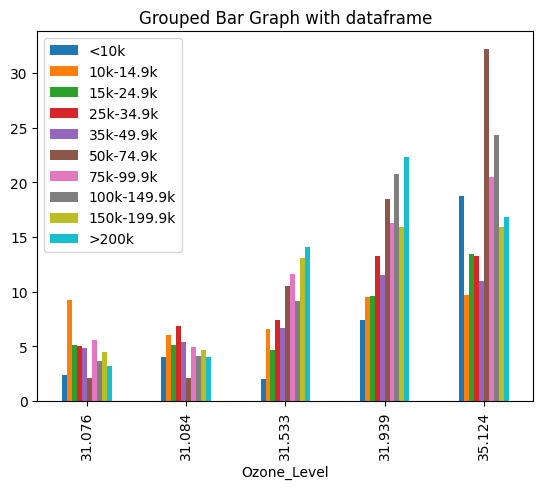

In [135]:
df_grouped_bar=pd.DataFrame(income_levels_population_percents, columns=['<10k', '10k-14.9k', '15k-24.9k', '25k-34.9k','35k-49.9k','50k-74.9k','75k-99.9k','100k-149.9k','150k-199.9k','>200k','Ozone_Level'])

df_grouped_bar.plot(x='Ozone_Level', 
        kind='bar', 
        stacked=False, 
        title='Grouped Bar Graph with dataframe') 

Since the ozone levels for the first 4 levels are very close we can take the average of them. And compare them with 35.124 ozone level.



In [136]:
def mean(lst): 
    return sum(lst) / len(lst)
#RECONSTRUCTING THE df_grouped_bar

income_levels_population_percents1=[[0 for _ in range(5)] for _ in range(10)]

for x in range(len(ozone_rows)):
    for y in range(len(income_columns)):
        
        row=ozone_rows[x]
        
        income_levels_population_percents1[y][x]= row[income_columns[y]].mean()
        
        
income_levels_population_percents1= list(np.array(income_levels_population_percents1).reshape(5,10))

new_rows=income_levels_population_percents1[0]+income_levels_population_percents1[1]+income_levels_population_percents1[2]+income_levels_population_percents1[3]

new_rows=new_rows/5

income_levels_population_percents2=[new_rows, income_levels_population_percents1[-1]]

income_levels_population_percents2=[list(x) for x in income_levels_population_percents2]

income_levels_population_percents2[0] += [np.round(mean(ozone_levels[:-1]),decimals=3)]
income_levels_population_percents2[-1] += [np.round(ozone_levels[-1],decimals=3)] 

<Axes: title={'center': 'Grouped Bar of Change in Air Quality Based on Percentages of People With Different Incomes'}, xlabel='Ozone_Level'>

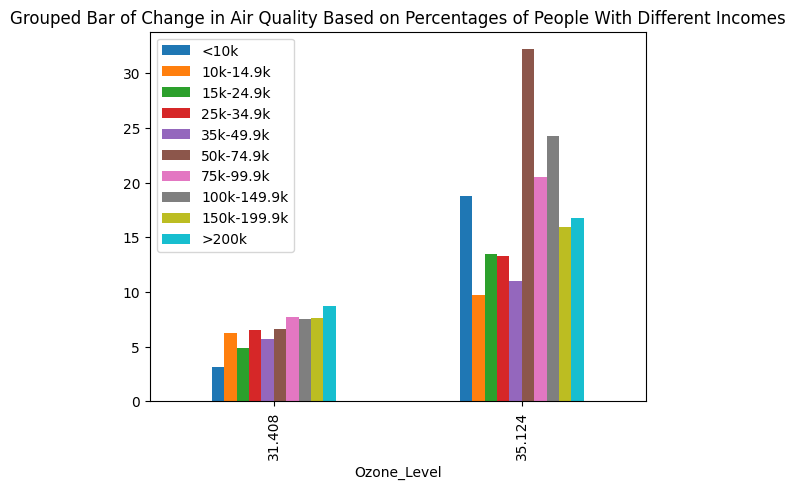

In [137]:
df_grouped_bar1=pd.DataFrame(income_levels_population_percents2, columns=['<10k', '10k-14.9k', '15k-24.9k', '25k-34.9k','35k-49.9k','50k-74.9k','75k-99.9k','100k-149.9k','150k-199.9k','>200k','Ozone_Level'])

df_grouped_bar1.plot(x='Ozone_Level', 
        kind='bar', 
        stacked=False, 
        title='Grouped Bar of Change in Air Quality Based on Percentages of People With Different Incomes')

Therefore, we can observe that in places with good air quality, the percentage of people who make 200k is the highest. And in places with poor air quality, the percentage of people who make 50k-74.9k is the highest.

## For PM Metric:

In [140]:
df_income.groupby(by="PM2.5AQI").groups.keys()

dict_keys([28.83933518, 29.01680672268908, 33.16081871345029, 33.36986301369863, 33.37362637362637])

In [141]:
pm_levels=list(df_income.groupby(by="PM2.5AQI").groups.keys())
pm_levels.sort()

pm_levels

[28.83933518,
 29.01680672268908,
 33.16081871345029,
 33.36986301369863,
 33.37362637362637]

Since the first two pm levels and the last three pm levels are close I will combine them accordingly

In [143]:
pm_row1=df_income.groupby(by="PM2.5AQI").get_group(pm_levels[0])
pm_row2=df_income.groupby(by="PM2.5AQI").get_group(pm_levels[1])
pm_row3=df_income.groupby(by="PM2.5AQI").get_group(pm_levels[2])
pm_row4=df_income.groupby(by="PM2.5AQI").get_group(pm_levels[3])
pm_row5=df_income.groupby(by="PM2.5AQI").get_group(pm_levels[4])

In [144]:
pm_rows=[pm_row1,pm_row2,pm_row3, pm_row4, pm_row5]

income_levels_population_percents3=[[0 for _ in range(5)] for _ in range(10)]

for x in range(len(pm_rows)):
    for y in range(len(income_columns)):
        
        row=pm_rows[x]
        
        income_levels_population_percents3[y][x]= row[income_columns[y]].mean()
        
        
income_levels_population_percents3= list(np.array(income_levels_population_percents3).reshape(5,10))

new_rows1_1=income_levels_population_percents3[0]+income_levels_population_percents3[1]
new_rows1_2=income_levels_population_percents3[2]+income_levels_population_percents3[3]+income_levels_population_percents3[4]

new_rows1_1=new_rows1_1/2
new_rows1_2=new_rows1_2/3

income_levels_population_percents4=[new_rows1_1, new_rows1_2]

income_levels_population_percents4=[list(x) for x in income_levels_population_percents4]

income_levels_population_percents4[0] += [np.round(mean(pm_levels[:-1]),decimals=3)]
income_levels_population_percents4[-1] += [np.round(pm_levels[-1],decimals=3)]   

<Axes: title={'center': 'Grouped Bar of Change in Air Quality Based on Percentages of People With Different Incomes'}, xlabel='PM_Level'>

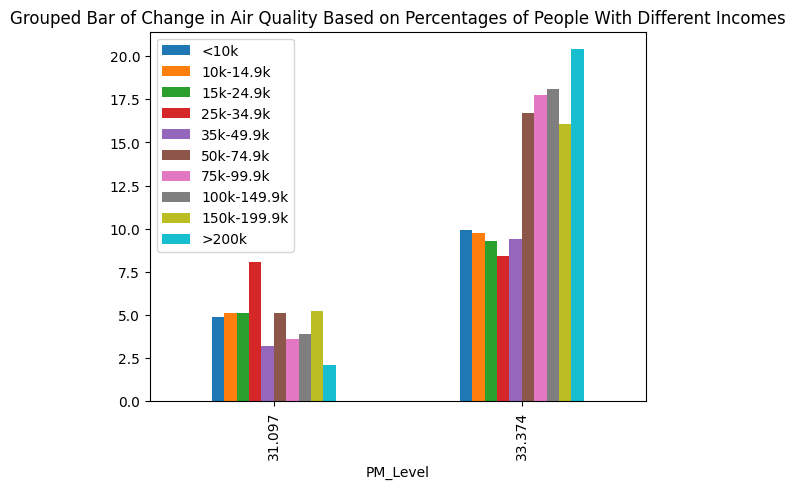

In [145]:
df_grouped_bar2=pd.DataFrame(income_levels_population_percents4, columns=['<10k', '10k-14.9k', '15k-24.9k', '25k-34.9k','35k-49.9k','50k-74.9k','75k-99.9k','100k-149.9k','150k-199.9k','>200k','PM_Level'])

df_grouped_bar2.plot(x='PM_Level', 
        kind='bar', 
        stacked=False, 
        title='Grouped Bar of Change in Air Quality Based on Percentages of People With Different Incomes')

### FINAL CONCLUSION: the inferences made with ozone metric and PM metric are not consistent. This shows that the factors for the levels of these metrics can be different. For example, while the highest determinant for PM level could be combustion processes, the highest determinant for ozone level could be photochemical reactions. Even though the high amount of these metrics signfies a bad air quality, the nature of their impact may vary. And this furhter investigation exceeds the scope of this project...

# DK

In [38]:
daily_Aqi = pd.read_csv('./Data/AQI/2021_Daily_Aqi_Data_Cleaned.csv')

daily_Aqi = daily_Aqi[['date', 'zip_code', 'OZONEAQI', 'PM2.5AQI']]

grouped_data = daily_Aqi.groupby(['zip_code', 'date']).mean().reset_index()

daily_Aqi.head()

date  zip_code  OZONEAQI  PM2.5AQI
0  2021-01-01      2045       NaN      40.0
1  2021-01-02      2045       NaN      17.0
2  2021-01-03      2045       NaN      25.0
3  2021-01-04      2045       NaN      28.0
4  2021-01-05      2045       NaN      20.0

In [39]:


fig_ozone = px.line(grouped_data, x='date', y='OZONEAQI', color='zip_code', title='Daily OZONEAQI Trends by Zip Code in Boston (2021)')
fig_ozone.update_layout(xaxis_title='Date', yaxis_title='OZONEAQI', legend_title='Zip Code')
fig_ozone.show()

# Creating the PM2.5AQI interactive plot
fig_pm25 = px.line(grouped_data, x='date', y='PM2.5AQI', color='zip_code', title='Daily PM2.5AQI Trends by Zip Code in Boston (2021)')
fig_pm25.update_layout(xaxis_title='Date', yaxis_title='PM2.5AQI', legend_title='Zip Code')
fig_pm25.show()

In [41]:
# For OZONEAQI
ozone_stats = grouped_data.groupby('zip_code')['OZONEAQI'].agg(['mean', 'max', 'min'])
ozone_stats = ozone_stats.rename(columns={"mean":"ozone_mean", "max": "ozone_max", "min": "ozone_min"})

# For PM2.5AQI
pm25_stats = grouped_data.groupby('zip_code')['PM2.5AQI'].agg(['mean', 'max', 'min'])
pm25_stats = pm25_stats.rename(columns={"mean":"pm25_mean", "max": "pm25_max", "min": "pm25_min"})

#Getting the dates
zip_codes = []
highest_ozone_dates = []
lowest_ozone_dates = []
highest_pm25_dates = []
lowest_pm25_dates = []

# Looping through each zip code to find the required dates
for zip_code in unique_zip_codes:
    zip_data = grouped_data[grouped_data['zip_code'] == zip_code]

    # Check for non-empty subsets before finding the dates
    if not zip_data[zip_data['OZONEAQI'] == zip_data['OZONEAQI'].max()].empty:
        highest_ozone_date = zip_data[zip_data['OZONEAQI'] == zip_data['OZONEAQI'].max()]['date'].iloc[0]
    else:
        highest_ozone_date = None  # Use None for missing data

    if not zip_data[zip_data['OZONEAQI'] == zip_data['OZONEAQI'].min()].empty:
        lowest_ozone_date = zip_data[zip_data['OZONEAQI'] == zip_data['OZONEAQI'].min()]['date'].iloc[0]
    else:
        lowest_ozone_date = None

    if not zip_data[zip_data['PM2.5AQI'] == zip_data['PM2.5AQI'].max()].empty:
        highest_pm25_date = zip_data[zip_data['PM2.5AQI'] == zip_data['PM2.5AQI'].max()]['date'].iloc[0]
    else:
        highest_pm25_date = None

    if not zip_data[zip_data['PM2.5AQI'] == zip_data['PM2.5AQI'].min()].empty:
        lowest_pm25_date = zip_data[zip_data['PM2.5AQI'] == zip_data['PM2.5AQI'].min()]['date'].iloc[0]
    else:
        lowest_pm25_date = None

    # Append the results to the lists
    zip_codes.append(zip_code)
    highest_ozone_dates.append(highest_ozone_date)
    lowest_ozone_dates.append(lowest_ozone_date)
    highest_pm25_dates.append(highest_pm25_date)
    lowest_pm25_dates.append(lowest_pm25_date)

# Creating the DataFrame
ozone_dates = pd.DataFrame({
    'zip_code': zip_codes,
    'Max_Ozone_Date': highest_ozone_dates,
    'Min_Ozone_Date': lowest_ozone_dates
})

pm25_dates = pd.DataFrame({
    'zip_code': zip_codes,
    'Max_PM2.5_Date': highest_pm25_dates,
    'Min_PM2.5_Date': lowest_pm25_dates
})
#Converting the result to a table




ozone_stats = pd.merge(ozone_stats, ozone_dates, on='zip_code')
pm25_stats = pd.merge(pm25_stats, pm25_dates, on='zip_code')

ozone_table = tabulate(ozone_stats, headers='keys', tablefmt='fancy_grid')
pm25_table = tabulate(pm25_stats, headers='keys', tablefmt='fancy_grid')

print(ozone_table)
print(pm25_table)

╒════╤════════════╤══════════════╤═════════════╤═════════════╤══════════════════╤══════════════════╕
│    │   zip_code │   ozone_mean │   ozone_max │   ozone_min │ Max_Ozone_Date   │ Min_Ozone_Date   │
╞════╪════════════╪══════════════╪═════════════╪═════════════╪══════════════════╪══════════════════╡
│  0 │       2045 │      35.1236 │         122 │           4 │ 2021-06-05       │ 2021-12-30       │
├────┼────────────┼──────────────┼─────────────┼─────────────┼──────────────────┼──────────────────┤
│  1 │       2108 │      31.0838 │         112 │           3 │ 2021-06-05       │ 2021-12-30       │
├────┼────────────┼──────────────┼─────────────┼─────────────┼──────────────────┼──────────────────┤
│  2 │       2109 │      31.0756 │         112 │           3 │ 2021-06-05       │ 2021-12-30       │
├────┼────────────┼──────────────┼─────────────┼─────────────┼──────────────────┼──────────────────┤
│  3 │       2110 │      31.0838 │         112 │           3 │ 2021-06-05       │ 2021-12-3

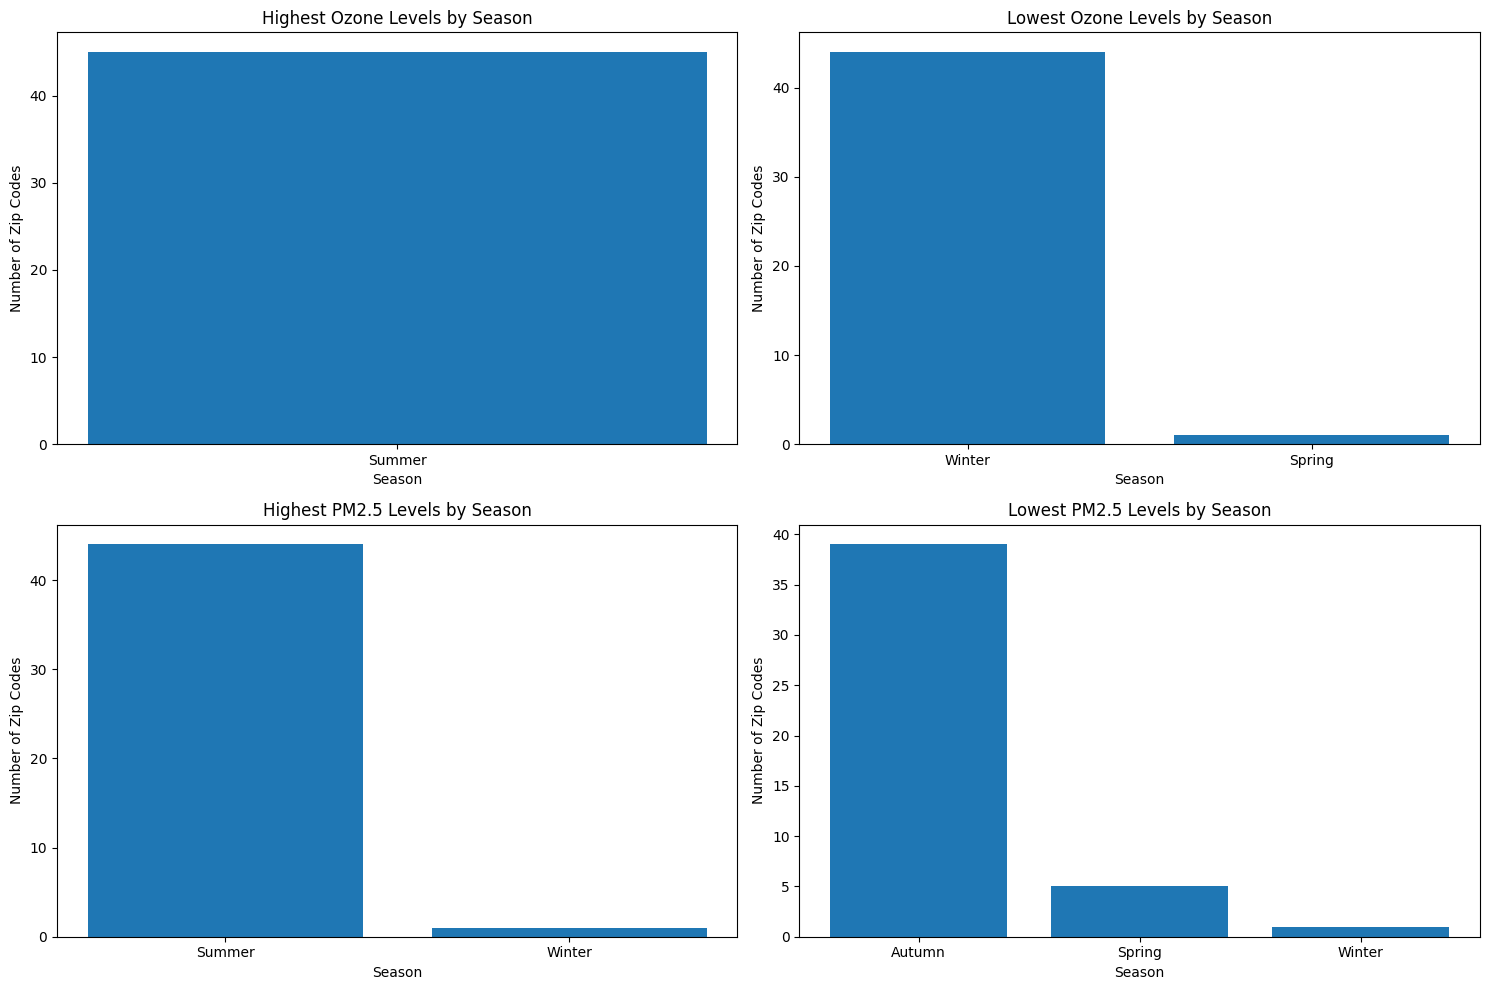

In [42]:
# Function to determine the season based on the month
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

# Assigning seasons to the highest and lowest air quality dates for ozone
ozone_stats['Max_Ozone_Season'] = pd.to_datetime(ozone_stats['Max_Ozone_Date']).dt.month.apply(get_season)
ozone_stats['Min_Ozone_Season'] = pd.to_datetime(ozone_stats['Min_Ozone_Date']).dt.month.apply(get_season)

# Assigning seasons to the highest and lowest air quality dates for PM2.5
pm25_stats['Max_PM2.5_Season'] = pd.to_datetime(pm25_stats['Max_PM2.5_Date']).dt.month.apply(get_season)
pm25_stats['Min_PM2.5_Season'] = pd.to_datetime(pm25_stats['Min_PM2.5_Date']).dt.month.apply(get_season)

# Function to plot bar chart for each category
def plot_seasonal_distribution(data, title, ax):
    season_counts = data.value_counts()
    ax.bar(season_counts.index, season_counts.values)
    ax.set_title(title)
    ax.set_xlabel('Season')
    ax.set_ylabel('Number of Zip Codes')

# Creating subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plotting bar charts
plot_seasonal_distribution(ozone_stats['Max_Ozone_Season'], 'Highest Ozone Levels by Season', axes[0, 0])
plot_seasonal_distribution(ozone_stats['Min_Ozone_Season'], 'Lowest Ozone Levels by Season', axes[0, 1])
plot_seasonal_distribution(pm25_stats['Max_PM2.5_Season'], 'Highest PM2.5 Levels by Season', axes[1, 0])
plot_seasonal_distribution(pm25_stats['Min_PM2.5_Season'], 'Lowest PM2.5 Levels by Season', axes[1, 1])

plt.tight_layout()
plt.show()

In [43]:
ozone_avg = grouped_data.groupby('zip_code')['OZONEAQI'].mean()
pm25_avg = grouped_data.groupby('zip_code')['PM2.5AQI'].mean()

avg_aqi = pd.DataFrame({
    'zip_code': ozone_avg.index,
    'Ozone_Avg': ozone_avg.values,
    'PM25_Avg': pm25_avg.values
})

# Calculating a combined AQI score (average of Ozone and PM2.5 AQI)
avg_aqi['Combined_AQI'] = (avg_aqi['Ozone_Avg'] + avg_aqi['PM25_Avg']) / 2

# Finding the zip codes with the best (lowest) and worst (highest) combined AQI scores
best_combined_aqi = avg_aqi.sort_values(by='Combined_AQI', ascending=True).head()
worst_combined_aqi = avg_aqi.sort_values(by='Combined_AQI', ascending=False).head()

best_combined_aqi, worst_combined_aqi

(    zip_code  Ozone_Avg   PM25_Avg  Combined_AQI
 42      2474  31.083799  28.839335     29.961567
 18      2129  31.083799  28.839335     29.961567
 17      2128  31.083799  28.839335     29.961567
 30      2145  31.083799  28.839335     29.961567
 31      2152  31.083799  28.839335     29.961567,
     zip_code  Ozone_Avg   PM25_Avg  Combined_AQI
 29      2144  31.532738  33.160819     32.346778
 23      2138  31.083799  33.369863     32.226831
 32      2163  31.083799  33.369863     32.226831
 1       2108  31.083799  33.369863     32.226831
 24      2139  31.083799  33.369863     32.226831)